## JAKUB

In [142]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
# wczytanie pliku bazowego do analizy
df = pd.read_csv("workspace_table1.csv")
# print(type(df))
df.head()

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,0,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,5008804,-1,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,2,5008804,-2,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,3,5008804,-3,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,4,5008804,-4,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [3]:
#analiza wystąpień danego STATUSU w całej bazie danych, liczba wierszy per konkretny status

df["STATUS"].value_counts()

C    274364
0    243034
X    122423
1      7619
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [4]:
## Usunięcie kolumny "Unnamed"
df = df.drop("Unnamed: 0", axis=1)
df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649739,5150487,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649740,5150487,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649741,5150487,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [5]:
# usnunięcie wierszy, które są X, stowrzenie nowej bazy, gdzie STATUS nie równa się == X
df1 = df[df.STATUS !="X"]

In [6]:
pd.set_option('float_format','{:.2f}'.format)

In [7]:
# sprawdzenie kolumn (w tym wypadku "AMT_INCOME_TOTAL") ogólnych miar - sprawdzenie outlierów, wartości odstających.

df1["AMT_INCOME_TOTAL"].describe()

count    527320.00
mean     195631.81
std      103859.72
min       27000.00
25%      135000.00
50%      180000.00
75%      225000.00
max     1575000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [8]:
# wyrównanie wyświetlania kolumn i nagłówków

pd.options.display.max_rows = 999

In [9]:
# sprawdzenie ilości wystąpień ilości wierszy w określonymi miesiącami 

df["MONTHS_BALANCE"].value_counts()

-1     20806
-2     20738
-3     20557
 0     20539
-4     20267
-5     19969
-6     19631
-7     19256
-8     18826
-9     18510
-10    18211
-11    17894
-12    17549
-13    17178
-14    16788
-15    16386
-16    16024
-17    15628
-18    15167
-19    14807
-20    14454
-21    14076
-22    13741
-23    13355
-24    12960
-25    12509
-26    12080
-27    11700
-28    11292
-29    10908
-30    10508
-31    10146
-32     9769
-33     9398
-34     9044
-35     8677
-36     8304
-37     7967
-38     7624
-39     7209
-40     6731
-41     6319
-42     5937
-43     5576
-44     5224
-45     4912
-46     4586
-47     4245
-48     3890
-49     3547
-50     3223
-51     2902
-52     2542
-53     2177
-54     1890
-55     1616
-56     1331
-57     1049
-58      808
-59      524
-60      262
Name: MONTHS_BALANCE, dtype: int64

In [10]:
# utowrzenie dla STATUSU dwóch grup 0 i 1, wykorzystując funkcję IS IN.
df1.loc[df['STATUS'].isin(['C','0','1']),'STATUS'] = '0'

C:\Conda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
# testowanie i sprawdzenie, wykorzystanie counta
df1["STATUS"].value_counts()

0    525017
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [12]:
# utowrzenie dla STATUS dwóch grup 0 i 1, wykorzystując funkcję IS IN
df1.loc[df['STATUS'].isin(['5','3','4','2']),'STATUS'] = '1'

In [13]:
#testowanie i sprawdzenie, wykorzystanie counta
df1["STATUS"].value_counts()

0    525017
1      2303
Name: STATUS, dtype: int64

In [14]:
# zmiana typu kolumny STATUS
df1["STATUS"] = df1["STATUS"].astype(int)

C:\Conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# usunięcie kolumny MONTH_BALANCE. Nie będzie ona nam dalej potrzebna, gdyż kolumna STATUS mówi nam czy 
#dany klient jest ok (STATUS==0) czy nie (STATUS==1)

df1 = df1.drop("MONTHS_BALANCE", axis=1)
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
3,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
4,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649739,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649740,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649741,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00


In [16]:
# wyliczenie STATUS dla danego klienta a następnie usunięcie duplikatów. Wszystko po to aby uzyskać unikatową wartość (czy jest ok czy nie)
# dla danego klienta

#%%time
i = 0
all_ids = len(df1["ID"].unique())
for ID in df1["ID"].unique():
    i += 1
    progress = i / all_ids
    if df1.loc[df1["ID"]== ID, "STATUS"].sum() > 0:
        df1.loc[df1["ID"]==ID, "STATUS"] = 1
    else:
        df1.loc[df1["ID"]==ID, "STATUS"] = 0
        
    if round(progress, 0) % 5 == 0:
        print(f'przeliczono {progress*100}% przypadkow')
df1.drop_duplicates(inplace=True)
df1.info()

przeliczono 0.0036405999708752% przypadkow
przeliczono 0.0072811999417504% przypadkow
przeliczono 0.010921799912625601% przypadkow
przeliczono 0.0145623998835008% przypadkow
przeliczono 0.018202999854376% przypadkow
przeliczono 0.021843599825251202% przypadkow
przeliczono 0.025484199796126403% przypadkow
przeliczono 0.0291247997670016% przypadkow
przeliczono 0.0327653997378768% przypadkow
przeliczono 0.036405999708752% przypadkow
przeliczono 0.040046599679627204% przypadkow
przeliczono 0.043687199650502405% przypadkow
przeliczono 0.047327799621377606% przypadkow
przeliczono 0.05096839959225281% przypadkow
przeliczono 0.054608999563128% przypadkow
przeliczono 0.0582495995340032% przypadkow
przeliczono 0.06189019950487841% przypadkow
przeliczono 0.0655307994757536% przypadkow
przeliczono 0.0691713994466288% przypadkow
przeliczono 0.072811999417504% przypadkow
przeliczono 0.0764525993883792% przypadkow
przeliczono 0.08009319935925441% przypadkow
przeliczono 0.08373379933012962% przypadkow

przeliczono 0.6989951944080385% przypadkow
przeliczono 0.7026357943789137% przypadkow
przeliczono 0.7062763943497888% przypadkow
przeliczono 0.709916994320664% przypadkow
przeliczono 0.7135575942915392% przypadkow
przeliczono 0.7171981942624145% przypadkow
przeliczono 0.7208387942332897% przypadkow
przeliczono 0.7244793942041649% przypadkow
przeliczono 0.72811999417504% przypadkow
przeliczono 0.7317605941459152% przypadkow
przeliczono 0.7354011941167905% przypadkow
przeliczono 0.7390417940876657% przypadkow
przeliczono 0.7426823940585409% przypadkow
przeliczono 0.746322994029416% przypadkow
przeliczono 0.7499635940002912% przypadkow
przeliczono 0.7536041939711665% przypadkow
przeliczono 0.7572447939420417% przypadkow
przeliczono 0.7608853939129168% przypadkow
przeliczono 0.764525993883792% przypadkow
przeliczono 0.7681665938546672% przypadkow
przeliczono 0.7718071938255424% przypadkow
przeliczono 0.7754477937964177% przypadkow
przeliczono 0.7790883937672928% przypadkow
przeliczono 0.78

przeliczono 1.4052715887578273% przypadkow
przeliczono 1.4089121887287024% przypadkow
przeliczono 1.4125527886995777% przypadkow
przeliczono 1.416193388670453% przypadkow
przeliczono 1.419833988641328% przypadkow
przeliczono 1.4234745886122033% przypadkow
przeliczono 1.4271151885830784% przypadkow
przeliczono 1.4307557885539537% przypadkow
przeliczono 1.434396388524829% przypadkow
przeliczono 1.438036988495704% przypadkow
przeliczono 1.4416775884665793% przypadkow
przeliczono 1.4453181884374544% przypadkow
przeliczono 1.4489587884083297% przypadkow
przeliczono 1.452599388379205% przypadkow
przeliczono 1.45623998835008% przypadkow
przeliczono 1.4598805883209554% przypadkow
przeliczono 1.4635211882918304% przypadkow
przeliczono 1.4671617882627057% przypadkow
przeliczono 1.470802388233581% przypadkow
przeliczono 1.474442988204456% przypadkow
przeliczono 1.4780835881753314% przypadkow
przeliczono 1.4817241881462064% przypadkow
przeliczono 1.4853647881170817% przypadkow
przeliczono 1.489005

przeliczono 2.1042667831658655% przypadkow
przeliczono 2.107907383136741% przypadkow
przeliczono 2.111547983107616% przypadkow
przeliczono 2.115188583078491% przypadkow
przeliczono 2.1188291830493666% przypadkow
przeliczono 2.1224697830202417% przypadkow
przeliczono 2.126110382991117% przypadkow
przeliczono 2.1297509829619923% przypadkow
przeliczono 2.1333915829328673% przypadkow
przeliczono 2.137032182903743% przypadkow
przeliczono 2.1406727828746175% przypadkow
przeliczono 2.144313382845493% przypadkow
przeliczono 2.147953982816368% przypadkow
przeliczono 2.151594582787243% przypadkow
przeliczono 2.1552351827581187% przypadkow
przeliczono 2.1588757827289937% przypadkow
przeliczono 2.1625163826998692% przypadkow
przeliczono 2.166156982670744% przypadkow
przeliczono 2.1697975826416194% przypadkow
przeliczono 2.173438182612495% przypadkow
przeliczono 2.1770787825833695% przypadkow
przeliczono 2.180719382554245% przypadkow
przeliczono 2.18435998252512% przypadkow
przeliczono 2.1880005824

przeliczono 2.876073976991408% przypadkow
przeliczono 2.879714576962283% przypadkow
przeliczono 2.8833551769331587% przypadkow
przeliczono 2.8869957769040338% przypadkow
przeliczono 2.890636376874909% przypadkow
przeliczono 2.8942769768457843% przypadkow
przeliczono 2.8979175768166594% przypadkow
przeliczono 2.9015581767875345% przypadkow
przeliczono 2.90519877675841% przypadkow
przeliczono 2.908839376729285% przypadkow
przeliczono 2.91247997670016% przypadkow
przeliczono 2.916120576671035% przypadkow
przeliczono 2.9197611766419107% przypadkow
przeliczono 2.9234017766127858% przypadkow
przeliczono 2.927042376583661% przypadkow
przeliczono 2.9306829765545364% przypadkow
przeliczono 2.9343235765254114% przypadkow
przeliczono 2.9379641764962865% przypadkow
przeliczono 2.941604776467162% przypadkow
przeliczono 2.945245376438037% przypadkow
przeliczono 2.948885976408912% przypadkow
przeliczono 2.952526576379787% przypadkow
przeliczono 2.9561671763506627% przypadkow
przeliczono 2.95980777632

przeliczono 3.6660841706713265% przypadkow
przeliczono 3.669724770642202% przypadkow
przeliczono 3.673365370613077% przypadkow
przeliczono 3.677005970583952% przypadkow
przeliczono 3.6806465705548277% przypadkow
przeliczono 3.6842871705257028% przypadkow
przeliczono 3.6879277704965774% przypadkow
przeliczono 3.6915683704674533% przypadkow
przeliczono 3.695208970438328% przypadkow
przeliczono 3.698849570409203% przypadkow
przeliczono 3.7024901703800785% przypadkow
przeliczono 3.7061307703509536% przypadkow
przeliczono 3.709771370321829% przypadkow
przeliczono 3.713411970292704% przypadkow
przeliczono 3.7170525702635793% przypadkow
przeliczono 3.720693170234455% przypadkow
przeliczono 3.72433377020533% przypadkow
przeliczono 3.727974370176205% przypadkow
przeliczono 3.7316149701470804% przypadkow
przeliczono 3.7352555701179555% przypadkow
przeliczono 3.7388961700888306% przypadkow
przeliczono 3.742536770059706% przypadkow
przeliczono 3.746177370030581% przypadkow
przeliczono 3.7498179700

przeliczono 4.379641764962866% przypadkow
przeliczono 4.383282364933741% przypadkow
przeliczono 4.386922964904616% przypadkow
przeliczono 4.3905635648754915% przypadkow
przeliczono 4.394204164846367% przypadkow
przeliczono 4.397844764817242% przypadkow
przeliczono 4.401485364788117% przypadkow
przeliczono 4.405125964758992% przypadkow
przeliczono 4.408766564729868% przypadkow
przeliczono 4.412407164700743% przypadkow
przeliczono 4.416047764671617% przypadkow
przeliczono 4.419688364642493% przypadkow
przeliczono 4.423328964613368% przypadkow
przeliczono 4.426969564584243% przypadkow
przeliczono 4.430610164555119% przypadkow
przeliczono 4.434250764525994% przypadkow
przeliczono 4.437891364496869% przypadkow
przeliczono 4.441531964467744% przypadkow
przeliczono 4.44517256443862% przypadkow
przeliczono 4.448813164409494% przypadkow
przeliczono 4.45245376438037% przypadkow
przeliczono 4.456094364351245% przypadkow
przeliczono 4.45973496432212% przypadkow
przeliczono 4.4633755642929955% przy

przeliczono 5.202417358380662% przypadkow
przeliczono 5.206057958351536% przypadkow
przeliczono 5.209698558322411% przypadkow
przeliczono 5.213339158293287% przypadkow
przeliczono 5.216979758264162% przypadkow
przeliczono 5.220620358235037% przypadkow
przeliczono 5.224260958205913% przypadkow
przeliczono 5.227901558176788% przypadkow
przeliczono 5.231542158147662% przypadkow
przeliczono 5.235182758118538% przypadkow
przeliczono 5.238823358089413% przypadkow
przeliczono 5.242463958060288% przypadkow
przeliczono 5.246104558031163% przypadkow
przeliczono 5.249745158002039% przypadkow
przeliczono 5.2533857579729135% przypadkow
przeliczono 5.257026357943789% przypadkow
przeliczono 5.2606669579146645% przypadkow
przeliczono 5.26430755788554% przypadkow
przeliczono 5.267948157856415% przypadkow
przeliczono 5.27158875782729% przypadkow
przeliczono 5.275229357798166% przypadkow
przeliczono 5.27886995776904% przypadkow
przeliczono 5.282510557739915% przypadkow
przeliczono 5.286151157710791% przy

przeliczono 6.028833551769332% przypadkow
przeliczono 6.032474151740207% przypadkow
przeliczono 6.036114751711082% przypadkow
przeliczono 6.039755351681957% przypadkow
przeliczono 6.043395951652832% przypadkow
przeliczono 6.047036551623708% przypadkow
przeliczono 6.0506771515945825% przypadkow
przeliczono 6.054317751565458% przypadkow
przeliczono 6.0579583515363336% przypadkow
przeliczono 6.061598951507208% przypadkow
przeliczono 6.065239551478084% przypadkow
przeliczono 6.068880151448959% przypadkow
przeliczono 6.072520751419834% przypadkow
przeliczono 6.076161351390709% przypadkow
przeliczono 6.079801951361585% przypadkow
przeliczono 6.0834425513324595% przypadkow
przeliczono 6.087083151303334% przypadkow
przeliczono 6.0907237512742105% przypadkow
przeliczono 6.094364351245085% przypadkow
przeliczono 6.09800495121596% przypadkow
przeliczono 6.101645551186836% przypadkow
przeliczono 6.105286151157711% przypadkow
przeliczono 6.108926751128585% przypadkow
przeliczono 6.112567351099461% 

przeliczono 6.793359545653124% przypadkow
przeliczono 6.797000145623999% przypadkow
przeliczono 6.800640745594874% przypadkow
przeliczono 6.804281345565749% przypadkow
przeliczono 6.807921945536624% przypadkow
przeliczono 6.811562545507499% przypadkow
przeliczono 6.8152031454783755% przypadkow
przeliczono 6.81884374544925% przypadkow
przeliczono 6.822484345420126% przypadkow
przeliczono 6.826124945391% przypadkow
przeliczono 6.829765545361875% przypadkow
przeliczono 6.83340614533275% przypadkow
przeliczono 6.837046745303627% przypadkow
przeliczono 6.840687345274501% przypadkow
przeliczono 6.844327945245377% przypadkow
przeliczono 6.8479685452162515% przypadkow
przeliczono 6.851609145187126% przypadkow
przeliczono 6.855249745158003% przypadkow
przeliczono 6.858890345128878% przypadkow
przeliczono 6.862530945099753% przypadkow
przeliczono 6.866171545070627% przypadkow
przeliczono 6.869812145041503% przypadkow
przeliczono 6.8734527450123775% przypadkow
przeliczono 6.877093344983254% przyp

przeliczono 7.612494539100044% przypadkow
przeliczono 7.616135139070919% przypadkow
przeliczono 7.619775739041794% przypadkow
przeliczono 7.623416339012669% przypadkow
przeliczono 7.627056938983544% przypadkow
przeliczono 7.63069753895442% przypadkow
przeliczono 7.634338138925295% przypadkow
przeliczono 7.63797873889617% przypadkow
przeliczono 7.641619338867045% przypadkow
przeliczono 7.64525993883792% przypadkow
przeliczono 7.648900538808796% przypadkow
przeliczono 7.652541138779672% przypadkow
przeliczono 7.656181738750546% przypadkow
przeliczono 7.659822338721421% przypadkow
przeliczono 7.663462938692296% przypadkow
przeliczono 7.667103538663171% przypadkow
przeliczono 7.670744138634047% przypadkow
przeliczono 7.674384738604923% przypadkow
przeliczono 7.6780253385757975% przypadkow
przeliczono 7.681665938546672% przypadkow
przeliczono 7.685306538517548% przypadkow
przeliczono 7.688947138488422% przypadkow
przeliczono 7.692587738459299% przypadkow
przeliczono 7.696228338430173% przyp

przeliczono 8.43527013251784% przypadkow
przeliczono 8.438910732488713% przypadkow
przeliczono 8.44255133245959% przypadkow
przeliczono 8.446191932430464% przypadkow
przeliczono 8.44983253240134% przypadkow
przeliczono 8.453473132372215% przypadkow
przeliczono 8.457113732343089% przypadkow
przeliczono 8.460754332313964% przypadkow
przeliczono 8.464394932284842% przypadkow
przeliczono 8.468035532255715% przypadkow
przeliczono 8.471676132226591% przypadkow
przeliczono 8.475316732197467% przypadkow
przeliczono 8.47895733216834% przypadkow
przeliczono 8.482597932139216% przypadkow
przeliczono 8.486238532110093% przypadkow
przeliczono 8.489879132080967% przypadkow
przeliczono 8.493519732051842% przypadkow
przeliczono 8.497160332022718% przypadkow
przeliczono 8.500800931993592% przypadkow
przeliczono 8.504441531964469% przypadkow
przeliczono 8.508082131935343% przypadkow
przeliczono 8.511722731906218% przypadkow
przeliczono 8.515363331877094% przypadkow
przeliczono 8.51900393184797% przypadk

przeliczono 9.20707732634338% przypadkow
przeliczono 9.210717926314256% przypadkow
przeliczono 9.214358526285132% przypadkow
przeliczono 9.217999126256007% przypadkow
przeliczono 9.221639726226883% przypadkow
przeliczono 9.225280326197757% przypadkow
przeliczono 9.228920926168632% przypadkow
przeliczono 9.232561526139508% przypadkow
przeliczono 9.236202126110383% przypadkow
przeliczono 9.239842726081259% przypadkow
przeliczono 9.243483326052134% przypadkow
przeliczono 9.247123926023008% przypadkow
przeliczono 9.250764525993883% przypadkow
przeliczono 9.254405125964759% przypadkow
przeliczono 9.258045725935634% przypadkow
przeliczono 9.26168632590651% przypadkow
przeliczono 9.265326925877385% przypadkow
przeliczono 9.26896752584826% przypadkow
przeliczono 9.272608125819135% przypadkow
przeliczono 9.27624872579001% przypadkow
przeliczono 9.279889325760886% przypadkow
przeliczono 9.283529925731761% przypadkow
przeliczono 9.287170525702635% przypadkow
przeliczono 9.29081112567351% przypadk

przeliczono 9.9825251201398% przypadkow
przeliczono 9.986165720110675% przypadkow
przeliczono 9.98980632008155% przypadkow
przeliczono 9.993446920052424% przypadkow
przeliczono 9.9970875200233% przypadkow
przeliczono 10.000728119994175% przypadkow
przeliczono 10.004368719965049% przypadkow
przeliczono 10.008009319935926% przypadkow
przeliczono 10.011649919906802% przypadkow
przeliczono 10.015290519877675% przypadkow
przeliczono 10.018931119848551% przypadkow
przeliczono 10.022571719819426% przypadkow
przeliczono 10.0262123197903% przypadkow
przeliczono 10.029852919761177% przypadkow
przeliczono 10.033493519732053% przypadkow
przeliczono 10.037134119702927% przypadkow
przeliczono 10.040774719673802% przypadkow
przeliczono 10.044415319644678% przypadkow
przeliczono 10.048055919615553% przypadkow
przeliczono 10.051696519586429% przypadkow
przeliczono 10.055337119557302% przypadkow
przeliczono 10.058977719528178% przypadkow
przeliczono 10.062618319499053% przypadkow
przeliczono 10.06625891

przeliczono 10.768894713848843% przypadkow
przeliczono 10.772535313819716% przypadkow
przeliczono 10.776175913790592% przypadkow
przeliczono 10.77981651376147% przypadkow
przeliczono 10.783457113732343% przypadkow
przeliczono 10.787097713703218% przypadkow
przeliczono 10.790738313674094% przypadkow
przeliczono 10.794378913644968% przypadkow
przeliczono 10.798019513615843% przypadkow
przeliczono 10.80166011358672% przypadkow
przeliczono 10.805300713557594% przypadkow
przeliczono 10.80894131352847% przypadkow
przeliczono 10.812581913499345% przypadkow
przeliczono 10.816222513470219% przypadkow
przeliczono 10.819863113441095% przypadkow
przeliczono 10.82350371341197% przypadkow
przeliczono 10.827144313382846% przypadkow
przeliczono 10.830784913353721% przypadkow
przeliczono 10.834425513324595% przypadkow
przeliczono 10.83806611329547% przypadkow
przeliczono 10.841706713266348% przypadkow
przeliczono 10.845347313237221% przypadkow
przeliczono 10.848987913208097% przypadkow
przeliczono 10.8

przeliczono 11.562545507499635% przypadkow
przeliczono 11.56618610747051% przypadkow
przeliczono 11.569826707441386% przypadkow
przeliczono 11.573467307412262% przypadkow
przeliczono 11.577107907383137% przypadkow
przeliczono 11.580748507354013% przypadkow
przeliczono 11.584389107324887% przypadkow
przeliczono 11.588029707295762% przypadkow
przeliczono 11.591670307266638% przypadkow
przeliczono 11.595310907237513% przypadkow
przeliczono 11.598951507208389% przypadkow
przeliczono 11.602592107179262% przypadkow
przeliczono 11.606232707150138% przypadkow
przeliczono 11.609873307121013% przypadkow
przeliczono 11.613513907091889% przypadkow
przeliczono 11.617154507062764% przypadkow
przeliczono 11.62079510703364% przypadkow
przeliczono 11.624435707004514% przypadkow
przeliczono 11.62807630697539% przypadkow
przeliczono 11.631716906946265% przypadkow
przeliczono 11.63535750691714% przypadkow
przeliczono 11.638998106888016% przypadkow
przeliczono 11.642638706858891% przypadkow
przeliczono 11.

przeliczono 12.367118101063056% przypadkow
przeliczono 12.37075870103393% przypadkow
przeliczono 12.374399301004805% przypadkow
przeliczono 12.378039900975681% przypadkow
przeliczono 12.381680500946555% przypadkow
przeliczono 12.385321100917432% przypadkow
przeliczono 12.388961700888308% przypadkow
przeliczono 12.392602300859181% przypadkow
przeliczono 12.396242900830057% przypadkow
przeliczono 12.399883500800932% przypadkow
przeliczono 12.403524100771806% przypadkow
przeliczono 12.407164700742683% przypadkow
przeliczono 12.410805300713559% przypadkow
przeliczono 12.414445900684433% przypadkow
przeliczono 12.418086500655308% przypadkow
przeliczono 12.421727100626184% przypadkow
przeliczono 12.425367700597057% przypadkow
przeliczono 12.429008300567935% przypadkow
przeliczono 12.432648900538808% przypadkow
przeliczono 12.436289500509684% przypadkow
przeliczono 12.43993010048056% przypadkow
przeliczono 12.443570700451435% przypadkow
przeliczono 12.447211300422309% przypadkow
przeliczono 1

przeliczono 13.084316295325472% przypadkow
przeliczono 13.087956895296346% przypadkow
przeliczono 13.091597495267221% przypadkow
przeliczono 13.095238095238097% przypadkow
przeliczono 13.09887869520897% przypadkow
przeliczono 13.102519295179846% przypadkow
przeliczono 13.106159895150721% przypadkow
przeliczono 13.109800495121595% przypadkow
przeliczono 13.11344109509247% przypadkow
przeliczono 13.117081695063346% przypadkow
przeliczono 13.12072229503422% przypadkow
przeliczono 13.124362895005095% przypadkow
przeliczono 13.128003494975973% przypadkow
przeliczono 13.131644094946848% przypadkow
przeliczono 13.135284694917724% przypadkow
przeliczono 13.138925294888598% przypadkow
przeliczono 13.142565894859473% przypadkow
przeliczono 13.146206494830349% przypadkow
przeliczono 13.149847094801222% przypadkow
przeliczono 13.153487694772098% przypadkow
przeliczono 13.157128294742973% przypadkow
przeliczono 13.160768894713847% przypadkow
przeliczono 13.164409494684723% przypadkow
przeliczono 13

przeliczono 13.783311489733507% przypadkow
przeliczono 13.786952089704382% przypadkow
przeliczono 13.790592689675258% przypadkow
przeliczono 13.794233289646135% przypadkow
przeliczono 13.79787388961701% przypadkow
przeliczono 13.801514489587884% przypadkow
przeliczono 13.80515508955876% przypadkow
przeliczono 13.808795689529635% przypadkow
przeliczono 13.81243628950051% przypadkow
przeliczono 13.816076889471384% przypadkow
przeliczono 13.81971748944226% przypadkow
przeliczono 13.823358089413135% przypadkow
przeliczono 13.826998689384009% przypadkow
przeliczono 13.830639289354885% przypadkow
przeliczono 13.83427988932576% przypadkow
przeliczono 13.837920489296637% przypadkow
przeliczono 13.841561089267513% przypadkow
przeliczono 13.845201689238387% przypadkow
przeliczono 13.848842289209262% przypadkow
przeliczono 13.852482889180138% przypadkow
przeliczono 13.856123489151011% przypadkow
przeliczono 13.859764089121887% przypadkow
przeliczono 13.863404689092762% przypadkow
przeliczono 13.8

przeliczono 14.58424348332605% przypadkow
przeliczono 14.58788408329693% przypadkow
przeliczono 14.591524683267803% przypadkow
przeliczono 14.595165283238678% przypadkow
przeliczono 14.598805883209554% przypadkow
przeliczono 14.602446483180428% przypadkow
przeliczono 14.606087083151303% przypadkow
przeliczono 14.609727683122179% przypadkow
przeliczono 14.613368283093052% przypadkow
przeliczono 14.617008883063928% przypadkow
przeliczono 14.620649483034803% przypadkow
przeliczono 14.624290083005679% przypadkow
przeliczono 14.627930682976553% przypadkow
przeliczono 14.63157128294743% przypadkow
przeliczono 14.635211882918306% przypadkow
przeliczono 14.638852482889181% przypadkow
przeliczono 14.642493082860057% przypadkow
przeliczono 14.64613368283093% przypadkow
przeliczono 14.649774282801806% przypadkow
przeliczono 14.653414882772681% przypadkow
przeliczono 14.657055482743555% przypadkow
przeliczono 14.66069608271443% przypadkow
przeliczono 14.664336682685306% przypadkow
przeliczono 14.6

przeliczono 15.294160477646715% przypadkow
przeliczono 15.297801077617592% przypadkow
przeliczono 15.301441677588468% przypadkow
przeliczono 15.305082277559343% przypadkow
przeliczono 15.308722877530217% przypadkow
przeliczono 15.312363477501092% przypadkow
przeliczono 15.316004077471968% przypadkow
przeliczono 15.319644677442842% przypadkow
przeliczono 15.323285277413717% przypadkow
przeliczono 15.326925877384593% przypadkow
przeliczono 15.330566477355468% przypadkow
przeliczono 15.334207077326342% przypadkow
przeliczono 15.337847677297217% przypadkow
przeliczono 15.341488277268095% przypadkow
przeliczono 15.34512887723897% przypadkow
przeliczono 15.348769477209846% przypadkow
przeliczono 15.35241007718072% przypadkow
przeliczono 15.356050677151595% przypadkow
przeliczono 15.35969127712247% przypadkow
przeliczono 15.363331877093344% przypadkow
przeliczono 15.36697247706422% przypadkow
przeliczono 15.370613077035095% przypadkow
przeliczono 15.374253677005969% przypadkow
przeliczono 15.

przeliczono 16.004077471967378% przypadkow
przeliczono 16.007718071938257% przypadkow
przeliczono 16.011358671909132% przypadkow
przeliczono 16.014999271880008% przypadkow
przeliczono 16.01863987185088% przypadkow
przeliczono 16.022280471821755% przypadkow
przeliczono 16.02592107179263% przypadkow
przeliczono 16.029561671763506% przypadkow
przeliczono 16.033202271734382% przypadkow
przeliczono 16.036842871705257% przypadkow
przeliczono 16.040483471676133% przypadkow
przeliczono 16.044124071647005% przypadkow
przeliczono 16.047764671617884% przypadkow
przeliczono 16.05140527158876% przypadkow
przeliczono 16.055045871559635% przypadkow
przeliczono 16.05868647153051% przypadkow
przeliczono 16.062327071501382% przypadkow
przeliczono 16.065967671472258% przypadkow
przeliczono 16.069608271443133% przypadkow
przeliczono 16.07324887141401% przypadkow
przeliczono 16.076889471384884% przypadkow
przeliczono 16.08053007135576% przypadkow
przeliczono 16.084170671326632% przypadkow
przeliczono 16.08

przeliczono 16.713994466288042% przypadkow
przeliczono 16.71763506625892% przypadkow
przeliczono 16.721275666229797% przypadkow
przeliczono 16.72491626620067% przypadkow
przeliczono 16.728556866171544% przypadkow
przeliczono 16.73219746614242% przypadkow
przeliczono 16.735838066113295% przypadkow
przeliczono 16.73947866608417% przypadkow
przeliczono 16.743119266055047% przypadkow
przeliczono 16.746759866025922% przypadkow
przeliczono 16.750400465996794% przypadkow
przeliczono 16.75404106596767% przypadkow
przeliczono 16.75768166593855% przypadkow
przeliczono 16.761322265909424% przypadkow
przeliczono 16.7649628658803% przypadkow
przeliczono 16.76860346585117% przypadkow
przeliczono 16.772244065822047% przypadkow
przeliczono 16.775884665792923% przypadkow
przeliczono 16.779525265763798% przypadkow
przeliczono 16.783165865734674% przypadkow
przeliczono 16.78680646570555% przypadkow
przeliczono 16.79044706567642% przypadkow
przeliczono 16.794087665647297% przypadkow
przeliczono 16.7977282

przeliczono 17.423911460608707% przypadkow
przeliczono 17.427552060579586% przypadkow
przeliczono 17.431192660550458% przypadkow
przeliczono 17.434833260521334% przypadkow
przeliczono 17.43847386049221% przypadkow
przeliczono 17.442114460463085% przypadkow
przeliczono 17.44575506043396% przypadkow
przeliczono 17.449395660404836% przypadkow
przeliczono 17.45303626037571% przypadkow
przeliczono 17.456676860346583% przypadkow
przeliczono 17.46031746031746% przypadkow
przeliczono 17.463958060288334% przypadkow
przeliczono 17.467598660259213% przypadkow
przeliczono 17.471239260230085% przypadkow
przeliczono 17.47487986020096% przypadkow
przeliczono 17.478520460171836% przypadkow
przeliczono 17.48216106014271% przypadkow
przeliczono 17.485801660113587% przypadkow
przeliczono 17.489442260084463% przypadkow
przeliczono 17.49308286005534% przypadkow
przeliczono 17.49672346002621% przypadkow
przeliczono 17.500364059997086% przypadkow
przeliczono 17.50400465996796% przypadkow
przeliczono 17.50764

przeliczono 18.2175622542595% przypadkow
przeliczono 18.221202854230377% przypadkow
przeliczono 18.224843454201253% przypadkow
przeliczono 18.228484054172128% przypadkow
przeliczono 18.232124654143004% przypadkow
przeliczono 18.23576525411388% przypadkow
przeliczono 18.239405854084755% przypadkow
przeliczono 18.243046454055627% przypadkow
przeliczono 18.246687054026502% przypadkow
przeliczono 18.250327653997378% przypadkow
przeliczono 18.253968253968253% przypadkow
przeliczono 18.25760885393913% przypadkow
przeliczono 18.261249453910004% przypadkow
przeliczono 18.26489005388088% przypadkow
przeliczono 18.268530653851755% przypadkow
przeliczono 18.27217125382263% przypadkow
przeliczono 18.275811853793506% przypadkow
przeliczono 18.27945245376438% przypadkow
przeliczono 18.283093053735257% przypadkow
przeliczono 18.28673365370613% przypadkow
przeliczono 18.290374253677005% przypadkow
przeliczono 18.29401485364788% przypadkow
przeliczono 18.297655453618756% przypadkow
przeliczono 18.30129

przeliczono 18.93111984855104% przypadkow
przeliczono 18.934760448521917% przypadkow
przeliczono 18.938401048492793% przypadkow
przeliczono 18.94204164846367% przypadkow
przeliczono 18.945682248434544% przypadkow
przeliczono 18.949322848405416% przypadkow
przeliczono 18.95296344837629% przypadkow
przeliczono 18.956604048347167% przypadkow
przeliczono 18.960244648318042% przypadkow
przeliczono 18.963885248288918% przypadkow
przeliczono 18.967525848259793% przypadkow
przeliczono 18.97116644823067% przypadkow
przeliczono 18.974807048201544% przypadkow
przeliczono 18.97844764817242% przypadkow
przeliczono 18.982088248143295% przypadkow
przeliczono 18.98572884811417% przypadkow
przeliczono 18.989369448085043% przypadkow
przeliczono 18.99301004805592% przypadkow
przeliczono 18.996650648026794% przypadkow
przeliczono 19.00029124799767% przypadkow
przeliczono 19.003931847968545% przypadkow
przeliczono 19.00757244793942% przypadkow
przeliczono 19.011213047910296% przypadkow
przeliczono 19.01485

przeliczono 19.75025484199796% przypadkow
przeliczono 19.753895441968837% przypadkow
przeliczono 19.757536041939712% przypadkow
przeliczono 19.761176641910584% przypadkow
przeliczono 19.764817241881463% przypadkow
przeliczono 19.76845784185234% przypadkow
przeliczono 19.772098441823214% przypadkow
przeliczono 19.77573904179409% przypadkow
przeliczono 19.77937964176496% przypadkow
przeliczono 19.783020241735837% przypadkow
przeliczono 19.786660841706713% przypadkow
przeliczono 19.790301441677588% przypadkow
przeliczono 19.793942041648464% przypadkow
przeliczono 19.79758264161934% przypadkow
przeliczono 19.80122324159021% przypadkow
przeliczono 19.80486384156109% przypadkow
przeliczono 19.808504441531966% przypadkow
przeliczono 19.81214504150284% przypadkow
przeliczono 19.815785641473717% przypadkow
przeliczono 19.81942624144459% przypadkow
przeliczono 19.823066841415464% przypadkow
przeliczono 19.82670744138634% przypadkow
przeliczono 19.830348041357215% przypadkow
przeliczono 19.833988

przeliczono 20.467453036260373% przypadkow
przeliczono 20.47109363623125% przypadkow
przeliczono 20.474734236202128% przypadkow
przeliczono 20.478374836173003% przypadkow
przeliczono 20.48201543614388% przypadkow
przeliczono 20.48565603611475% przypadkow
przeliczono 20.489296636085626% przypadkow
przeliczono 20.492937236056502% przypadkow
przeliczono 20.496577836027377% przypadkow
przeliczono 20.500218435998253% przypadkow
przeliczono 20.50385903596913% przypadkow
przeliczono 20.50749963594% przypadkow
przeliczono 20.511140235910876% przypadkow
przeliczono 20.514780835881755% przypadkow
przeliczono 20.51842143585263% przypadkow
przeliczono 20.522062035823506% przypadkow
przeliczono 20.525702635794378% przypadkow
przeliczono 20.529343235765253% przypadkow
przeliczono 20.53298383573613% przypadkow
przeliczono 20.536624435707004% przypadkow
przeliczono 20.54026503567788% przypadkow
przeliczono 20.543905635648755% przypadkow
przeliczono 20.547546235619627% przypadkow
przeliczono 20.5511868

przeliczono 21.19921363040629% przypadkow
przeliczono 21.202854230377167% przypadkow
przeliczono 21.206494830348042% przypadkow
przeliczono 21.210135430318918% przypadkow
przeliczono 21.21377603028979% przypadkow
przeliczono 21.217416630260665% przypadkow
przeliczono 21.22105723023154% przypadkow
przeliczono 21.22469783020242% przypadkow
przeliczono 21.228338430173295% przypadkow
przeliczono 21.231979030144167% przypadkow
przeliczono 21.235619630115043% przypadkow
przeliczono 21.239260230085918% przypadkow
przeliczono 21.242900830056794% przypadkow
przeliczono 21.24654143002767% przypadkow
przeliczono 21.250182029998545% przypadkow
przeliczono 21.253822629969417% przypadkow
przeliczono 21.257463229940292% przypadkow
przeliczono 21.261103829911168% przypadkow
przeliczono 21.264744429882047% przypadkow
przeliczono 21.268385029852922% przypadkow
przeliczono 21.272025629823794% przypadkow
przeliczono 21.27566622979467% przypadkow
przeliczono 21.279306829765545% przypadkow
przeliczono 21.28

przeliczono 21.95281782437746% przypadkow
przeliczono 21.956458424348334% przypadkow
przeliczono 21.960099024319206% przypadkow
przeliczono 21.96373962429008% przypadkow
przeliczono 21.967380224260957% przypadkow
przeliczono 21.971020824231832% przypadkow
przeliczono 21.97466142420271% przypadkow
przeliczono 21.978302024173583% przypadkow
przeliczono 21.98194262414446% przypadkow
przeliczono 21.985583224115334% przypadkow
przeliczono 21.98922382408621% przypadkow
przeliczono 21.992864424057085% przypadkow
przeliczono 21.99650502402796% przypadkow
przeliczono 22.000145623998833% przypadkow
przeliczono 22.00378622396971% przypadkow
przeliczono 22.007426823940584% przypadkow
przeliczono 22.01106742391146% przypadkow
przeliczono 22.014708023882335% przypadkow
przeliczono 22.018348623853214% przypadkow
przeliczono 22.021989223824086% przypadkow
przeliczono 22.02562982379496% przypadkow
przeliczono 22.029270423765837% przypadkow
przeliczono 22.032911023736713% przypadkow
przeliczono 22.03655

przeliczono 22.688219018494248% przypadkow
przeliczono 22.691859618465124% przypadkow
przeliczono 22.695500218436% przypadkow
przeliczono 22.699140818406875% przypadkow
przeliczono 22.70278141837775% przypadkow
przeliczono 22.706422018348622% przypadkow
przeliczono 22.710062618319498% przypadkow
przeliczono 22.713703218290373% przypadkow
przeliczono 22.71734381826125% przypadkow
przeliczono 22.720984418232124% przypadkow
przeliczono 22.724625018203% przypadkow
przeliczono 22.728265618173875% przypadkow
przeliczono 22.73190621814475% przypadkow
przeliczono 22.735546818115626% przypadkow
przeliczono 22.7391874180865% przypadkow
przeliczono 22.742828018057377% przypadkow
przeliczono 22.746468618028253% przypadkow
przeliczono 22.750109217999125% przypadkow
przeliczono 22.75374981797% przypadkow
przeliczono 22.757390417940876% przypadkow
przeliczono 22.76103101791175% przypadkow
przeliczono 22.764671617882627% przypadkow
przeliczono 22.768312217853502% przypadkow
przeliczono 22.771952817824

przeliczono 23.441823212465415% przypadkow
przeliczono 23.44546381243629% przypadkow
przeliczono 23.449104412407166% przypadkow
przeliczono 23.45274501237804% przypadkow
przeliczono 23.456385612348914% przypadkow
przeliczono 23.46002621231979% przypadkow
przeliczono 23.463666812290665% przypadkow
przeliczono 23.46730741226154% przypadkow
przeliczono 23.470948012232416% przypadkow
przeliczono 23.47458861220329% przypadkow
przeliczono 23.478229212174167% przypadkow
przeliczono 23.481869812145042% przypadkow
przeliczono 23.485510412115918% przypadkow
przeliczono 23.489151012086793% przypadkow
przeliczono 23.49279161205767% przypadkow
przeliczono 23.49643221202854% przypadkow
przeliczono 23.500072811999416% przypadkow
przeliczono 23.503713411970292% przypadkow
przeliczono 23.507354011941167% przypadkow
przeliczono 23.510994611912043% przypadkow
przeliczono 23.51463521188292% przypadkow
przeliczono 23.51827581185379% przypadkow
przeliczono 23.52191641182467% przypadkow
przeliczono 23.525557

przeliczono 24.213630406290957% przypadkow
przeliczono 24.217271006261832% przypadkow
przeliczono 24.220911606232708% przypadkow
przeliczono 24.22455220620358% przypadkow
przeliczono 24.22819280617446% przypadkow
przeliczono 24.231833406145334% przypadkow
przeliczono 24.23547400611621% przypadkow
przeliczono 24.239114606087085% przypadkow
przeliczono 24.242755206057957% przypadkow
przeliczono 24.246395806028833% przypadkow
przeliczono 24.250036405999708% przypadkow
przeliczono 24.253677005970584% przypadkow
przeliczono 24.25731760594146% przypadkow
przeliczono 24.260958205912335% przypadkow
przeliczono 24.26459880588321% przypadkow
przeliczono 24.268239405854082% przypadkow
przeliczono 24.27188000582496% przypadkow
przeliczono 24.275520605795837% przypadkow
przeliczono 24.279161205766712% przypadkow
przeliczono 24.282801805737584% przypadkow
przeliczono 24.28644240570846% przypadkow
przeliczono 24.290083005679335% przypadkow
przeliczono 24.29372360565021% przypadkow
przeliczono 24.2973

przeliczono 25.0% przypadkow
przeliczono 25.00364059997088% przypadkow
przeliczono 25.00728119994175% przypadkow
przeliczono 25.010921799912627% przypadkow
przeliczono 25.0145623998835% przypadkow
przeliczono 25.018202999854378% przypadkow
przeliczono 25.02184359982525% przypadkow
przeliczono 25.02548419979613% przypadkow
przeliczono 25.029124799767% przypadkow
przeliczono 25.032765399737876% przypadkow
przeliczono 25.036405999708748% przypadkow
przeliczono 25.040046599679627% przypadkow
przeliczono 25.043687199650506% przypadkow
przeliczono 25.047327799621378% przypadkow
przeliczono 25.050968399592254% przypadkow
przeliczono 25.054608999563126% przypadkow
przeliczono 25.058249599534005% przypadkow
przeliczono 25.061890199504877% przypadkow
przeliczono 25.065530799475756% przypadkow
przeliczono 25.069171399446628% przypadkow
przeliczono 25.072811999417503% przypadkow
przeliczono 25.076452599388375% przypadkow
przeliczono 25.080093199359254% przypadkow
przeliczono 25.083733799330133% pr

przeliczono 25.77180719382554% przypadkow
przeliczono 25.77544779379642% przypadkow
przeliczono 25.779088393767292% przypadkow
przeliczono 25.782728993738168% przypadkow
przeliczono 25.78636959370904% przypadkow
przeliczono 25.79001019367992% przypadkow
przeliczono 25.793650793650798% przypadkow
przeliczono 25.79729139362167% przypadkow
przeliczono 25.800931993592545% przypadkow
przeliczono 25.804572593563417% przypadkow
przeliczono 25.808213193534296% przypadkow
przeliczono 25.81185379350517% przypadkow
przeliczono 25.815494393476047% przypadkow
przeliczono 25.81913499344692% przypadkow
przeliczono 25.822775593417795% przypadkow
przeliczono 25.826416193388667% przypadkow
przeliczono 25.830056793359546% przypadkow
przeliczono 25.833697393330418% przypadkow
przeliczono 25.837337993301297% przypadkow
przeliczono 25.840978593272173% przypadkow
przeliczono 25.844619193243044% przypadkow
przeliczono 25.848259793213924% przypadkow
przeliczono 25.851900393184795% przypadkow
przeliczono 25.855

przeliczono 26.496286588029704% przypadkow
przeliczono 26.499927188000584% przypadkow
przeliczono 26.50356778797146% przypadkow
przeliczono 26.50720838794233% przypadkow
przeliczono 26.51084898791321% przypadkow
przeliczono 26.514489587884082% przypadkow
przeliczono 26.51813018785496% przypadkow
przeliczono 26.521770787825833% przypadkow
przeliczono 26.52541138779671% przypadkow
przeliczono 26.52905198776758% przypadkow
przeliczono 26.53269258773846% przypadkow
przeliczono 26.53633318770933% przypadkow
przeliczono 26.53997378768021% przypadkow
przeliczono 26.543614387651083% przypadkow
przeliczono 26.54725498762196% przypadkow
przeliczono 26.550895587592837% przypadkow
przeliczono 26.55453618756371% przypadkow
przeliczono 26.558176787534588% przypadkow
przeliczono 26.56181738750546% przypadkow
przeliczono 26.565457987476336% przypadkow
przeliczono 26.56909858744721% przypadkow
przeliczono 26.572739187418087% przypadkow
przeliczono 26.57637978738896% przypadkow
przeliczono 26.5800203873

przeliczono 27.246250182029996% przypadkow
przeliczono 27.249890782000875% przypadkow
przeliczono 27.253531381971747% przypadkow
przeliczono 27.257171981942623% przypadkow
przeliczono 27.260812581913502% przypadkow
przeliczono 27.264453181884374% przypadkow
przeliczono 27.268093781855253% przypadkow
przeliczono 27.271734381826125% przypadkow
przeliczono 27.275374981797% przypadkow
przeliczono 27.279015581767872% przypadkow
przeliczono 27.28265618173875% przypadkow
przeliczono 27.286296781709623% przypadkow
przeliczono 27.289937381680502% przypadkow
przeliczono 27.293577981651374% przypadkow
przeliczono 27.29721858162225% przypadkow
przeliczono 27.30085918159313% przypadkow
przeliczono 27.304499781564% przypadkow
przeliczono 27.30814038153488% przypadkow
przeliczono 27.311780981505752% przypadkow
przeliczono 27.315421581476627% przypadkow
przeliczono 27.3190621814475% przypadkow
przeliczono 27.32270278141838% przypadkow
przeliczono 27.32634338138925% przypadkow
przeliczono 27.3299839813

przeliczono 27.945245376438038% przypadkow
przeliczono 27.94888597640891% przypadkow
przeliczono 27.95252657637979% przypadkow
przeliczono 27.95616717635066% przypadkow
przeliczono 27.959807776321536% przypadkow
przeliczono 27.963448376292416% przypadkow
przeliczono 27.967088976263287% przypadkow
przeliczono 27.970729576234167% przypadkow
przeliczono 27.97437017620504% przypadkow
przeliczono 27.978010776175914% przypadkow
przeliczono 27.981651376146786% przypadkow
przeliczono 27.985291976117665% przypadkow
przeliczono 27.988932576088537% przypadkow
przeliczono 27.992573176059416% przypadkow
przeliczono 27.996213776030288% przypadkow
przeliczono 27.999854376001167% przypadkow
przeliczono 28.00349497597204% przypadkow
przeliczono 28.007135575942915% przypadkow
przeliczono 28.010776175913794% przypadkow
przeliczono 28.014416775884666% przypadkow
przeliczono 28.01805737585554% przypadkow
przeliczono 28.021697975826417% przypadkow
przeliczono 28.025338575797292% przypadkow
przeliczono 28.02

przeliczono 28.64788117081695% przypadkow
przeliczono 28.651521770787824% przypadkow
przeliczono 28.655162370758703% przypadkow
przeliczono 28.658802970729575% przypadkow
przeliczono 28.662443570700454% przypadkow
przeliczono 28.666084170671326% przypadkow
przeliczono 28.6697247706422% przypadkow
przeliczono 28.67336537061308% przypadkow
przeliczono 28.677005970583952% przypadkow
przeliczono 28.68064657055483% przypadkow
przeliczono 28.684287170525703% przypadkow
przeliczono 28.68792777049658% przypadkow
przeliczono 28.69156837046745% przypadkow
przeliczono 28.69520897043833% przypadkow
przeliczono 28.6988495704092% przypadkow
przeliczono 28.70249017038008% przypadkow
przeliczono 28.706130770350953% przypadkow
przeliczono 28.70977137032183% przypadkow
przeliczono 28.7134119702927% przypadkow
przeliczono 28.71705257026358% przypadkow
przeliczono 28.72069317023446% przypadkow
przeliczono 28.72433377020533% przypadkow
przeliczono 28.727974370176206% przypadkow
przeliczono 28.7316149701470

przeliczono 29.34687636522499% przypadkow
przeliczono 29.350516965195865% przypadkow
przeliczono 29.354157565166737% przypadkow
przeliczono 29.357798165137616% przypadkow
przeliczono 29.36143876510849% przypadkow
przeliczono 29.365079365079367% przypadkow
przeliczono 29.36871996505024% przypadkow
przeliczono 29.372360565021115% przypadkow
przeliczono 29.376001164991987% przypadkow
przeliczono 29.379641764962866% przypadkow
przeliczono 29.383282364933745% przypadkow
przeliczono 29.386922964904617% przypadkow
przeliczono 29.390563564875492% przypadkow
przeliczono 29.394204164846364% przypadkow
przeliczono 29.397844764817243% przypadkow
przeliczono 29.401485364788115% przypadkow
przeliczono 29.405125964758994% przypadkow
przeliczono 29.408766564729866% przypadkow
przeliczono 29.412407164700742% przypadkow
przeliczono 29.416047764671617% przypadkow
przeliczono 29.419688364642493% przypadkow
przeliczono 29.423328964613365% przypadkow
przeliczono 29.426969564584244% przypadkow
przeliczono 29

przeliczono 30.158730158730158% przypadkow
przeliczono 30.162370758701034% przypadkow
przeliczono 30.166011358671906% przypadkow
przeliczono 30.169651958642785% przypadkow
przeliczono 30.173292558613657% przypadkow
przeliczono 30.176933158584536% przypadkow
przeliczono 30.18057375855541% przypadkow
przeliczono 30.184214358526283% przypadkow
przeliczono 30.187854958497162% przypadkow
przeliczono 30.191495558468034% przypadkow
przeliczono 30.195136158438913% przypadkow
przeliczono 30.198776758409785% przypadkow
przeliczono 30.20241735838066% przypadkow
przeliczono 30.206057958351533% przypadkow
przeliczono 30.209698558322412% przypadkow
przeliczono 30.213339158293284% przypadkow
przeliczono 30.216979758264163% przypadkow
przeliczono 30.22062035823504% przypadkow
przeliczono 30.22426095820591% przypadkow
przeliczono 30.22790155817679% przypadkow
przeliczono 30.23154215814766% przypadkow
przeliczono 30.23518275811854% przypadkow
przeliczono 30.238823358089412% przypadkow
przeliczono 30.242

przeliczono 30.966943352264455% przypadkow
przeliczono 30.97058395223533% przypadkow
przeliczono 30.974224552206202% przypadkow
przeliczono 30.97786515217708% przypadkow
przeliczono 30.981505752147953% przypadkow
przeliczono 30.985146352118832% przypadkow
przeliczono 30.988786952089704% przypadkow
przeliczono 30.99242755206058% przypadkow
przeliczono 30.99606815203145% przypadkow
przeliczono 30.99970875200233% przypadkow
przeliczono 31.003349351973203% przypadkow
przeliczono 31.00698995194408% przypadkow
przeliczono 31.010630551914957% przypadkow
przeliczono 31.01427115188583% przypadkow
przeliczono 31.01791175185671% przypadkow
przeliczono 31.02155235182758% przypadkow
przeliczono 31.02519295179846% przypadkow
przeliczono 31.02883355176933% przypadkow
przeliczono 31.032474151740207% przypadkow
przeliczono 31.03611475171108% przypadkow
przeliczono 31.039755351681958% przypadkow
przeliczono 31.04339595165283% przypadkow
przeliczono 31.04703655162371% przypadkow
przeliczono 31.0506771515

przeliczono 31.756953545944373% przypadkow
przeliczono 31.760594145915245% przypadkow
przeliczono 31.76423474588612% przypadkow
przeliczono 31.767875345857% przypadkow
przeliczono 31.771515945827872% przypadkow
przeliczono 31.77515654579875% przypadkow
przeliczono 31.778797145769623% przypadkow
przeliczono 31.7824377457405% przypadkow
przeliczono 31.78607834571137% przypadkow
przeliczono 31.78971894568225% przypadkow
przeliczono 31.79335954565312% przypadkow
przeliczono 31.797000145624% przypadkow
przeliczono 31.800640745594873% przypadkow
przeliczono 31.804281345565748% przypadkow
przeliczono 31.807921945536627% przypadkow
przeliczono 31.8115625455075% przypadkow
przeliczono 31.815203145478378% przypadkow
przeliczono 31.81884374544925% przypadkow
przeliczono 31.822484345420126% przypadkow
przeliczono 31.826124945390998% przypadkow
przeliczono 31.829765545361877% przypadkow
przeliczono 31.83340614533275% przypadkow
przeliczono 31.837046745303628% przypadkow
przeliczono 31.8406873452745

przeliczono 32.54332313965341% przypadkow
przeliczono 32.54696373962429% przypadkow
przeliczono 32.55060433959516% przypadkow
przeliczono 32.55424493956604% przypadkow
przeliczono 32.55788553953692% przypadkow
przeliczono 32.56152613950779% przypadkow
przeliczono 32.56516673947867% przypadkow
przeliczono 32.56880733944954% przypadkow
przeliczono 32.57244793942042% przypadkow
przeliczono 32.57608853939129% przypadkow
przeliczono 32.579729139362165% przypadkow
przeliczono 32.58336973933304% przypadkow
przeliczono 32.587010339303916% przypadkow
przeliczono 32.59065093927479% przypadkow
przeliczono 32.59429153924567% przypadkow
przeliczono 32.597932139216546% przypadkow
przeliczono 32.60157273918742% przypadkow
przeliczono 32.6052133391583% przypadkow
przeliczono 32.60885393912917% przypadkow
przeliczono 32.61249453910005% przypadkow
przeliczono 32.61613513907092% przypadkow
przeliczono 32.61977573904179% przypadkow
przeliczono 32.623416339012664% przypadkow
przeliczono 32.62705693898354% 

przeliczono 33.253240133974074% przypadkow
przeliczono 33.25688073394495% przypadkow
przeliczono 33.260521333915825% przypadkow
przeliczono 33.264161933886705% przypadkow
przeliczono 33.267802533857584% przypadkow
przeliczono 33.271443133828456% przypadkow
przeliczono 33.275083733799335% przypadkow
przeliczono 33.27872433377021% przypadkow
przeliczono 33.28236493374108% przypadkow
przeliczono 33.28600553371196% przypadkow
przeliczono 33.28964613368283% przypadkow
przeliczono 33.2932867336537% przypadkow
przeliczono 33.29692733362458% przypadkow
przeliczono 33.30056793359545% przypadkow
przeliczono 33.30420853356633% przypadkow
przeliczono 33.30784913353721% przypadkow
przeliczono 33.31148973350808% przypadkow
przeliczono 33.31513033347896% przypadkow
przeliczono 33.318770933449834% przypadkow
przeliczono 33.32241153342071% przypadkow
przeliczono 33.326052133391585% przypadkow
przeliczono 33.32969273336246% przypadkow
przeliczono 33.33333333333333% przypadkow
przeliczono 33.336973933304

przeliczono 34.05417212756662% przypadkow
przeliczono 34.0578127275375% przypadkow
przeliczono 34.061453327508374% przypadkow
przeliczono 34.06509392747925% przypadkow
przeliczono 34.068734527450125% przypadkow
przeliczono 34.072375127421% przypadkow
przeliczono 34.07601572739188% przypadkow
przeliczono 34.07965632736275% przypadkow
przeliczono 34.08329692733362% przypadkow
przeliczono 34.0869375273045% przypadkow
przeliczono 34.09057812727537% przypadkow
przeliczono 34.09421872724625% przypadkow
przeliczono 34.09785932721712% przypadkow
przeliczono 34.101499927188% przypadkow
przeliczono 34.10514052715888% przypadkow
przeliczono 34.10878112712975% przypadkow
przeliczono 34.112421727100624% przypadkow
przeliczono 34.1160623270715% przypadkow
przeliczono 34.119702927042376% przypadkow
przeliczono 34.12334352701325% przypadkow
przeliczono 34.12698412698413% przypadkow
przeliczono 34.130624726955% przypadkow
przeliczono 34.13426532692588% przypadkow
przeliczono 34.13790592689675% przypadk

przeliczono 34.76772972185817% przypadkow
przeliczono 34.77137032182904% przypadkow
przeliczono 34.77501092179992% przypadkow
przeliczono 34.77865152177079% przypadkow
przeliczono 34.78229212174166% przypadkow
przeliczono 34.785932721712534% przypadkow
przeliczono 34.78957332168341% przypadkow
przeliczono 34.793213921654285% przypadkow
przeliczono 34.796854521625164% przypadkow
przeliczono 34.800495121596036% przypadkow
przeliczono 34.804135721566915% przypadkow
przeliczono 34.80777632153779% przypadkow
przeliczono 34.811416921508666% przypadkow
przeliczono 34.815057521479545% przypadkow
przeliczono 34.81869812145042% przypadkow
przeliczono 34.82233872142129% przypadkow
przeliczono 34.82597932139216% przypadkow
przeliczono 34.82961992136304% przypadkow
przeliczono 34.83326052133391% przypadkow
przeliczono 34.83690112130479% przypadkow
przeliczono 34.84054172127566% przypadkow
przeliczono 34.84418232124654% przypadkow
przeliczono 34.847822921217414% przypadkow
przeliczono 34.85146352118

przeliczono 35.481287316149704% przypadkow
przeliczono 35.484927916120576% przypadkow
przeliczono 35.48856851609145% przypadkow
przeliczono 35.49220911606233% przypadkow
przeliczono 35.4958497160332% przypadkow
przeliczono 35.49949031600408% przypadkow
przeliczono 35.50313091597495% przypadkow
przeliczono 35.50677151594583% przypadkow
przeliczono 35.5104121159167% przypadkow
przeliczono 35.51405271588758% przypadkow
przeliczono 35.51769331585846% przypadkow
przeliczono 35.52133391582933% przypadkow
przeliczono 35.5249745158002% przypadkow
przeliczono 35.528615115771075% przypadkow
przeliczono 35.532255715741954% przypadkow
przeliczono 35.535896315712826% przypadkow
przeliczono 35.539536915683705% przypadkow
przeliczono 35.54317751565458% przypadkow
przeliczono 35.546818115625456% przypadkow
przeliczono 35.55045871559633% przypadkow
przeliczono 35.55409931556721% przypadkow
przeliczono 35.55773991553808% przypadkow
przeliczono 35.56138051550896% przypadkow
przeliczono 35.56502111547984%

przeliczono 36.25309450997524% przypadkow
przeliczono 36.25673510994612% przypadkow
przeliczono 36.26037570991699% przypadkow
przeliczono 36.26401630988787% przypadkow
przeliczono 36.267656909858744% przypadkow
przeliczono 36.27129750982962% przypadkow
przeliczono 36.274938109800495% przypadkow
przeliczono 36.27857870977137% przypadkow
przeliczono 36.282219309742246% przypadkow
przeliczono 36.28585990971312% przypadkow
przeliczono 36.289500509684% przypadkow
przeliczono 36.29314110965487% przypadkow
przeliczono 36.29678170962575% przypadkow
przeliczono 36.30042230959662% przypadkow
przeliczono 36.3040629095675% przypadkow
przeliczono 36.30770350953837% przypadkow
przeliczono 36.31134410950925% przypadkow
przeliczono 36.31498470948012% przypadkow
przeliczono 36.318625309450994% przypadkow
przeliczono 36.32226590942187% przypadkow
przeliczono 36.325906509392745% przypadkow
przeliczono 36.329547109363624% przypadkow
przeliczono 36.333187709334496% przypadkow
przeliczono 36.336828309305375

przeliczono 37.017620503859035% przypadkow
przeliczono 37.021261103829914% przypadkow
przeliczono 37.024901703800786% przypadkow
przeliczono 37.02854230377166% przypadkow
przeliczono 37.03218290374254% przypadkow
przeliczono 37.03582350371341% przypadkow
przeliczono 37.03946410368429% przypadkow
przeliczono 37.04310470365516% przypadkow
przeliczono 37.04674530362604% przypadkow
przeliczono 37.05038590359691% przypadkow
przeliczono 37.05402650356779% przypadkow
przeliczono 37.05766710353866% przypadkow
przeliczono 37.06130770350954% przypadkow
przeliczono 37.06494830348041% przypadkow
przeliczono 37.068588903451285% przypadkow
przeliczono 37.072229503422164% przypadkow
przeliczono 37.07587010339304% przypadkow
przeliczono 37.079510703363916% przypadkow
przeliczono 37.08315130333479% przypadkow
przeliczono 37.08679190330567% przypadkow
przeliczono 37.09043250327654% przypadkow
przeliczono 37.09407310324742% przypadkow
przeliczono 37.09771370321829% przypadkow
przeliczono 37.1013543031891

przeliczono 37.7420998980632% przypadkow
przeliczono 37.745740498034074% przypadkow
przeliczono 37.74938109800495% przypadkow
przeliczono 37.753021697975825% przypadkow
przeliczono 37.756662297946704% przypadkow
przeliczono 37.760302897917576% przypadkow
przeliczono 37.763943497888455% przypadkow
przeliczono 37.76758409785933% przypadkow
przeliczono 37.7712246978302% przypadkow
przeliczono 37.77486529780108% przypadkow
przeliczono 37.77850589777195% przypadkow
przeliczono 37.78214649774283% przypadkow
przeliczono 37.7857870977137% przypadkow
przeliczono 37.78942769768458% przypadkow
przeliczono 37.79306829765545% przypadkow
przeliczono 37.79670889762633% przypadkow
przeliczono 37.8003494975972% przypadkow
przeliczono 37.80399009756808% przypadkow
przeliczono 37.807630697538954% przypadkow
przeliczono 37.81127129750983% przypadkow
przeliczono 37.814911897480705% przypadkow
przeliczono 37.81855249745158% przypadkow
przeliczono 37.822193097422456% przypadkow
przeliczono 37.82583369739333%

przeliczono 38.481141692150864% przypadkow
przeliczono 38.48478229212174% przypadkow
przeliczono 38.488422892092615% przypadkow
przeliczono 38.492063492063494% przypadkow
przeliczono 38.495704092034366% przypadkow
przeliczono 38.499344692005245% przypadkow
przeliczono 38.50298529197612% przypadkow
przeliczono 38.506625891946996% przypadkow
przeliczono 38.51026649191787% przypadkow
przeliczono 38.51390709188875% przypadkow
przeliczono 38.51754769185962% przypadkow
przeliczono 38.52118829183049% przypadkow
przeliczono 38.52482889180137% przypadkow
przeliczono 38.52846949177224% przypadkow
przeliczono 38.53211009174312% przypadkow
przeliczono 38.53575069171399% przypadkow
przeliczono 38.53939129168487% przypadkow
przeliczono 38.543031891655744% przypadkow
przeliczono 38.54667249162662% przypadkow
przeliczono 38.550313091597495% przypadkow
przeliczono 38.553953691568374% przypadkow
przeliczono 38.557594291539246% przypadkow
przeliczono 38.56123489151012% przypadkow
przeliczono 38.564875491

przeliczono 39.25294888597641% przypadkow
przeliczono 39.25658948594729% przypadkow
przeliczono 39.26023008591816% przypadkow
przeliczono 39.26387068588903% przypadkow
przeliczono 39.26751128585991% przypadkow
przeliczono 39.27115188583078% przypadkow
przeliczono 39.27479248580166% przypadkow
przeliczono 39.278433085772534% przypadkow
przeliczono 39.28207368574341% przypadkow
przeliczono 39.285714285714285% przypadkow
przeliczono 39.289354885685164% przypadkow
przeliczono 39.292995485656036% przypadkow
przeliczono 39.296636085626915% przypadkow
przeliczono 39.30027668559779% przypadkow
przeliczono 39.303917285568666% przypadkow
przeliczono 39.30755788553954% przypadkow
przeliczono 39.31119848551041% przypadkow
przeliczono 39.31483908548128% przypadkow
przeliczono 39.31847968545216% przypadkow
przeliczono 39.32212028542304% przypadkow
przeliczono 39.32576088539391% przypadkow
przeliczono 39.32940148536479% przypadkow
przeliczono 39.33304208533566% przypadkow
przeliczono 39.3366826853065

przeliczono 40.039318479685456% przypadkow
przeliczono 40.04295907965633% przypadkow
przeliczono 40.04659967962721% przypadkow
przeliczono 40.05024027959808% przypadkow
przeliczono 40.05388087956895% przypadkow
przeliczono 40.05752147953983% przypadkow
przeliczono 40.0611620795107% przypadkow
przeliczono 40.06480267948157% przypadkow
przeliczono 40.06844327945245% przypadkow
przeliczono 40.07208387942333% przypadkow
przeliczono 40.075724479394204% przypadkow
przeliczono 40.07936507936508% przypadkow
przeliczono 40.083005679335955% przypadkow
przeliczono 40.086646279306834% przypadkow
przeliczono 40.090286879277706% przypadkow
przeliczono 40.09392747924858% przypadkow
przeliczono 40.09756807921946% przypadkow
przeliczono 40.10120867919033% przypadkow
przeliczono 40.1048492791612% przypadkow
przeliczono 40.10848987913208% przypadkow
przeliczono 40.11213047910296% przypadkow
przeliczono 40.11577107907383% przypadkow
przeliczono 40.11941167904471% przypadkow
przeliczono 40.12305227901558% 

przeliczono 40.7965632736275% przypadkow
przeliczono 40.80020387359837% przypadkow
przeliczono 40.80384447356924% przypadkow
przeliczono 40.807485073540114% przypadkow
przeliczono 40.81112567351099% przypadkow
przeliczono 40.814766273481865% przypadkow
przeliczono 40.818406873452744% przypadkow
przeliczono 40.82204747342362% przypadkow
przeliczono 40.825688073394495% przypadkow
przeliczono 40.829328673365374% przypadkow
przeliczono 40.832969273336246% przypadkow
przeliczono 40.836609873307125% przypadkow
przeliczono 40.840250473278% przypadkow
przeliczono 40.84389107324887% przypadkow
przeliczono 40.84753167321974% przypadkow
przeliczono 40.85117227319062% przypadkow
przeliczono 40.85481287316149% przypadkow
przeliczono 40.85845347313237% przypadkow
przeliczono 40.86209407310325% przypadkow
przeliczono 40.86573467307412% przypadkow
przeliczono 40.869375273045% przypadkow
przeliczono 40.87301587301587% przypadkow
przeliczono 40.87665647298675% przypadkow
przeliczono 40.880297072957624% 

przeliczono 41.579292267365666% przypadkow
przeliczono 41.58293286733654% przypadkow
przeliczono 41.58657346730742% przypadkow
przeliczono 41.59021406727829% przypadkow
przeliczono 41.59385466724916% przypadkow
przeliczono 41.59749526722003% przypadkow
przeliczono 41.60113586719091% przypadkow
przeliczono 41.604776467161784% przypadkow
przeliczono 41.60841706713266% przypadkow
przeliczono 41.61205766710354% przypadkow
przeliczono 41.615698267074414% przypadkow
przeliczono 41.61933886704529% przypadkow
przeliczono 41.622979467016165% przypadkow
przeliczono 41.626620066987044% przypadkow
przeliczono 41.630260666957916% przypadkow
przeliczono 41.63390126692879% przypadkow
przeliczono 41.63754186689966% przypadkow
przeliczono 41.64118246687054% przypadkow
przeliczono 41.64482306684141% przypadkow
przeliczono 41.64846366681229% przypadkow
przeliczono 41.65210426678316% przypadkow
przeliczono 41.65574486675404% przypadkow
przeliczono 41.65938546672492% przypadkow
przeliczono 41.6630260666957

przeliczono 42.39842726081258% przypadkow
przeliczono 42.402067860783454% przypadkow
przeliczono 42.40570846075433% przypadkow
przeliczono 42.40934906072521% przypadkow
przeliczono 42.412989660696084% przypadkow
przeliczono 42.41663026066696% przypadkow
przeliczono 42.420270860637835% przypadkow
przeliczono 42.42391146060871% przypadkow
przeliczono 42.42755206057958% przypadkow
przeliczono 42.43119266055046% przypadkow
przeliczono 42.43483326052133% przypadkow
przeliczono 42.43847386049221% przypadkow
przeliczono 42.44211446046308% przypadkow
przeliczono 42.44575506043396% przypadkow
przeliczono 42.44939566040484% przypadkow
przeliczono 42.45303626037571% przypadkow
przeliczono 42.45667686034659% przypadkow
przeliczono 42.46031746031746% przypadkow
przeliczono 42.463958060288334% przypadkow
przeliczono 42.467598660259206% przypadkow
przeliczono 42.471239260230085% przypadkow
przeliczono 42.47487986020096% przypadkow
przeliczono 42.478520460171836% przypadkow
przeliczono 42.482161060142

przeliczono 43.210281054317754% przypadkow
przeliczono 43.213921654288626% przypadkow
przeliczono 43.2175622542595% przypadkow
przeliczono 43.22120285423038% przypadkow
przeliczono 43.22484345420125% przypadkow
przeliczono 43.22848405417213% przypadkow
przeliczono 43.232124654143% przypadkow
przeliczono 43.23576525411388% przypadkow
przeliczono 43.23940585408476% przypadkow
przeliczono 43.24304645405563% przypadkow
przeliczono 43.24668705402651% przypadkow
przeliczono 43.25032765399738% przypadkow
przeliczono 43.25396825396825% przypadkow
przeliczono 43.257608853939125% przypadkow
przeliczono 43.261249453910004% przypadkow
przeliczono 43.264890053880876% przypadkow
przeliczono 43.268530653851755% przypadkow
przeliczono 43.27217125382263% przypadkow
przeliczono 43.275811853793506% przypadkow
przeliczono 43.27945245376438% przypadkow
przeliczono 43.28309305373526% przypadkow
przeliczono 43.286733653706136% przypadkow
przeliczono 43.29037425367701% przypadkow
przeliczono 43.29401485364788

przeliczono 44.02941604776467% przypadkow
przeliczono 44.03305664773555% przypadkow
przeliczono 44.03669724770643% przypadkow
przeliczono 44.0403378476773% przypadkow
przeliczono 44.04397844764817% przypadkow
przeliczono 44.047619047619044% przypadkow
przeliczono 44.05125964758992% przypadkow
przeliczono 44.054900247560795% przypadkow
przeliczono 44.058540847531674% przypadkow
przeliczono 44.062181447502546% przypadkow
przeliczono 44.065822047473425% przypadkow
przeliczono 44.0694626474443% przypadkow
przeliczono 44.073103247415176% przypadkow
przeliczono 44.076743847386055% przypadkow
przeliczono 44.08038444735693% przypadkow
przeliczono 44.0840250473278% przypadkow
przeliczono 44.08766564729867% przypadkow
przeliczono 44.09130624726955% przypadkow
przeliczono 44.09494684724042% przypadkow
przeliczono 44.0985874472113% przypadkow
przeliczono 44.10222804718217% przypadkow
przeliczono 44.10586864715305% przypadkow
przeliczono 44.109509247123924% przypadkow
przeliczono 44.1131498470948% 

przeliczono 44.84855104121159% przypadkow
przeliczono 44.852191641182465% przypadkow
przeliczono 44.855832241153344% przypadkow
przeliczono 44.859472841124216% przypadkow
przeliczono 44.863113441095095% przypadkow
przeliczono 44.866754041065974% przypadkow
przeliczono 44.870394641036846% przypadkow
przeliczono 44.87403524100772% przypadkow
przeliczono 44.87767584097859% przypadkow
przeliczono 44.88131644094947% przypadkow
przeliczono 44.88495704092034% przypadkow
przeliczono 44.88859764089122% przypadkow
przeliczono 44.89223824086209% przypadkow
przeliczono 44.89587884083297% przypadkow
przeliczono 44.89951944080384% przypadkow
przeliczono 44.90316004077472% przypadkow
przeliczono 44.906800640745594% przypadkow
przeliczono 44.91044124071647% przypadkow
przeliczono 44.914081840687345% przypadkow
przeliczono 44.91772244065822% przypadkow
przeliczono 44.921363040629096% przypadkow
przeliczono 44.92500364059997% przypadkow
przeliczono 44.92864424057085% przypadkow
przeliczono 44.9322848405

przeliczono 45.66768603465851% przypadkow
przeliczono 45.67132663462939% przypadkow
przeliczono 45.67496723460026% przypadkow
przeliczono 45.67860783457114% przypadkow
przeliczono 45.68224843454201% przypadkow
przeliczono 45.68588903451289% przypadkow
przeliczono 45.68952963448376% przypadkow
przeliczono 45.69317023445464% przypadkow
przeliczono 45.69681083442551% przypadkow
przeliczono 45.70045143439639% przypadkow
przeliczono 45.704092034367264% przypadkow
przeliczono 45.707732634338136% przypadkow
przeliczono 45.711373234309015% przypadkow
przeliczono 45.71501383427989% przypadkow
przeliczono 45.718654434250766% przypadkow
przeliczono 45.72229503422164% przypadkow
przeliczono 45.72593563419252% przypadkow
przeliczono 45.72957623416339% przypadkow
przeliczono 45.73321683413427% przypadkow
przeliczono 45.73685743410514% przypadkow
przeliczono 45.74049803407602% przypadkow
przeliczono 45.74413863404689% przypadkow
przeliczono 45.74777923401776% przypadkow
przeliczono 45.75141983398864%

przeliczono 46.446774428425805% przypadkow
przeliczono 46.45041502839668% przypadkow
przeliczono 46.454055628367556% przypadkow
przeliczono 46.45769622833843% przypadkow
przeliczono 46.46133682830931% przypadkow
przeliczono 46.46497742828018% przypadkow
przeliczono 46.46861802825106% przypadkow
przeliczono 46.47225862822193% przypadkow
przeliczono 46.47589922819281% przypadkow
przeliczono 46.47953982816368% przypadkow
przeliczono 46.48318042813456% przypadkow
przeliczono 46.48682102810543% przypadkow
przeliczono 46.490461628076304% przypadkow
przeliczono 46.49410222804718% przypadkow
przeliczono 46.497742828018055% przypadkow
przeliczono 46.501383427988934% przypadkow
przeliczono 46.505024027959806% przypadkow
przeliczono 46.508664627930685% przypadkow
przeliczono 46.51230522790156% przypadkow
przeliczono 46.515945827872436% przypadkow
przeliczono 46.51958642784331% przypadkow
przeliczono 46.52322702781419% przypadkow
przeliczono 46.52686762778506% przypadkow
przeliczono 46.53050822775

przeliczono 47.24770642201835% przypadkow
przeliczono 47.251347021989226% przypadkow
przeliczono 47.2549876219601% przypadkow
przeliczono 47.25862822193098% przypadkow
przeliczono 47.26226882190185% przypadkow
przeliczono 47.26590942187273% przypadkow
przeliczono 47.2695500218436% przypadkow
przeliczono 47.27319062181448% przypadkow
przeliczono 47.27683122178535% przypadkow
przeliczono 47.28047182175622% przypadkow
przeliczono 47.2841124217271% przypadkow
przeliczono 47.287753021697974% przypadkow
przeliczono 47.29139362166885% przypadkow
przeliczono 47.295034221639725% przypadkow
przeliczono 47.298674821610604% przypadkow
przeliczono 47.302315421581476% przypadkow
przeliczono 47.305956021552355% przypadkow
przeliczono 47.30959662152323% przypadkow
przeliczono 47.313237221494106% przypadkow
przeliczono 47.31687782146498% przypadkow
przeliczono 47.32051842143585% przypadkow
przeliczono 47.32415902140673% przypadkow
przeliczono 47.3277996213776% przypadkow
przeliczono 47.33144022134848% 

przeliczono 48.037716615698265% przypadkow
przeliczono 48.041357215669144% przypadkow
przeliczono 48.044997815640016% przypadkow
przeliczono 48.048638415610895% przypadkow
przeliczono 48.05227901558177% przypadkow
przeliczono 48.05591961555265% przypadkow
przeliczono 48.05956021552352% przypadkow
przeliczono 48.0632008154944% przypadkow
przeliczono 48.06684141546527% przypadkow
przeliczono 48.07048201543614% przypadkow
przeliczono 48.07412261540701% przypadkow
przeliczono 48.07776321537789% przypadkow
przeliczono 48.08140381534877% przypadkow
przeliczono 48.08504441531964% przypadkow
przeliczono 48.08868501529052% przypadkow
przeliczono 48.092325615261394% przypadkow
przeliczono 48.095966215232274% przypadkow
przeliczono 48.099606815203146% przypadkow
przeliczono 48.103247415174025% przypadkow
przeliczono 48.1068880151449% przypadkow
przeliczono 48.11052861511577% przypadkow
przeliczono 48.11416921508665% przypadkow
przeliczono 48.11780981505752% przypadkow
przeliczono 48.1214504150283

przeliczono 48.842289209261686% przypadkow
przeliczono 48.845929809232565% przypadkow
przeliczono 48.84957040920344% przypadkow
przeliczono 48.853211009174316% przypadkow
przeliczono 48.85685160914519% przypadkow
przeliczono 48.86049220911606% przypadkow
przeliczono 48.86413280908693% przypadkow
przeliczono 48.86777340905781% przypadkow
przeliczono 48.87141400902868% przypadkow
przeliczono 48.87505460899956% przypadkow
przeliczono 48.87869520897044% przypadkow
przeliczono 48.88233580894131% przypadkow
przeliczono 48.88597640891219% przypadkow
przeliczono 48.889617008883064% przypadkow
przeliczono 48.89325760885394% przypadkow
przeliczono 48.896898208824815% przypadkow
przeliczono 48.90053880879569% przypadkow
przeliczono 48.90417940876656% przypadkow
przeliczono 48.90782000873744% przypadkow
przeliczono 48.91146060870831% przypadkow
przeliczono 48.91510120867919% przypadkow
przeliczono 48.91874180865007% przypadkow
przeliczono 48.92238240862094% przypadkow
przeliczono 48.92602300859182

przeliczono 49.65778360273773% przypadkow
przeliczono 49.6614242027086% przypadkow
przeliczono 49.66506480267948% przypadkow
przeliczono 49.66870540265036% przypadkow
przeliczono 49.67234600262123% przypadkow
przeliczono 49.67598660259211% przypadkow
przeliczono 49.67962720256298% przypadkow
przeliczono 49.68326780253386% przypadkow
przeliczono 49.686908402504734% przypadkow
przeliczono 49.690549002475606% przypadkow
przeliczono 49.69418960244648% przypadkow
przeliczono 49.69783020241736% przypadkow
przeliczono 49.70147080238823% przypadkow
przeliczono 49.70511140235911% przypadkow
przeliczono 49.70875200232999% przypadkow
przeliczono 49.71239260230086% przypadkow
przeliczono 49.71603320227174% przypadkow
przeliczono 49.71967380224261% przypadkow
przeliczono 49.72331440221349% przypadkow
przeliczono 49.72695500218436% przypadkow
przeliczono 49.73059560215523% przypadkow
przeliczono 49.734236202126105% przypadkow
przeliczono 49.737876802096984% przypadkow
przeliczono 49.741517402067856%

KeyboardInterrupt: 

In [17]:
df1.reset_index(drop=True)

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
3,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
4,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527315,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
527316,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
527317,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
527318,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00


In [18]:
# M - 1 # Y - 1
# F - 0 # N - 0
# Standaryzacja kolumn CODE_GENDER, FLAG_OWN_REALITY oraz FLAG_OWN_CAR (zamiana M - 1, F - 0, Y - 1, N - 0 itp.)

df1.loc[df['CODE_GENDER'].isin(['M']),'CODE_GENDER'] = '1'
df1.loc[df['CODE_GENDER'].isin(['F']),'CODE_GENDER'] = '0'

df1.loc[df['FLAG_OWN_REALTY'].isin(['Y']),'FLAG_OWN_REALTY'] = '1'
df1.loc[df['FLAG_OWN_REALTY'].isin(['N']),'FLAG_OWN_REALTY'] = '0'

df1.loc[df['FLAG_OWN_CAR'].isin(['Y']),'FLAG_OWN_CAR'] = '1'
df1.loc[df['FLAG_OWN_CAR'].isin(['N']),'FLAG_OWN_CAR'] = '0'


In [19]:
# wyliczenie wieku klienta oraz ilość lat zatrudnienia, zostały dodane nowej kolumny na końcu

df1['Day_Birth'] = df1['DAYS_BIRTH'].abs()/365
df1['Day_Birth'] = df1['Day_Birth'].astype('int64')

df1['Day_Emplyed'] = df1['DAYS_EMPLOYED'].abs()/365
df1['Day_Emplyed'] = df1['Day_Emplyed'].astype('int64')


In [20]:
df1.head(4)

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed
0,5008804,0,1,1,1,0,427500.00,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.00,32,12
1,5008804,0,1,1,1,0,427500.00,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.00,32,12
2,5008804,0,1,1,1,0,427500.00,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.00,32,12
3,5008804,0,1,1,1,0,427500.00,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.00,32,12


In [21]:
# NAME_INCOME_TYPE
# NAME_EDUCATION_TYPE
# NAME_FAMILY_STATUS
# NAME_HOUSING_TYPE
# NAME_FAMILY_STATUS

# sprawdzenie ilości wystąpień dla poszczególnych kolumn (tam gdzie wystąpuje dtype==text). 
# wszystko po to żeby można było zrobić standaryzacje i normalizację. (0 ,1) 
# dla NAME_EDUCATION_STATUS można zrobić kategoryzację wg określonego stopnia edukacji, gdyż będzie to miało
# wpływ na nasz model, jeśli ktoś ma lepsze wykształcenie (np. Lower - 0, Secondar - 1 etc.)
# dla pozostałych kolumn należy zrobić standaryzację i normalizację 0 i 1.

df1["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    345212
Higher education                 153143
Incomplete higher                 24113
Lower secondary                    4179
Academic degree                     673
Name: NAME_EDUCATION_TYPE, dtype: int64

## Anna

In [22]:
#Przypisanie skali punktowej  do typu edukacji 
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']),'NAME_EDUCATION_TYPE'] = '1'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Higher education']),'NAME_EDUCATION_TYPE'] = '3'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Incomplete higher']),'NAME_EDUCATION_TYPE'] = '2'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Lower secondary']),'NAME_EDUCATION_TYPE'] = '0'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Academic degree']),'NAME_EDUCATION_TYPE'] = '4'


In [23]:
#Przypisanie skali punktowej  do typu dochodów, dzielimy na umowę o pracę (2), działalność (1) i inne  (0)
df1.loc[df['NAME_INCOME_TYPE'].isin(['Working']),'NAME_INCOME_TYPE'] = '2'
df1.loc[df['NAME_INCOME_TYPE'].isin(['Commercial associate']),'NAME_INCOME_TYPE'] = '1'
df1.loc[df['NAME_INCOME_TYPE'].isin(['State servant', 'Pensioner', 'Student']),'NAME_INCOME_TYPE'] = '0'

In [24]:
#Przypisanie skali punktowej - singiel (1) lub nie (0)
df1.loc[df['NAME_FAMILY_STATUS'].isin(['Married', 'Civil marriage']),'NAME_FAMILY_STATUS'] = '1'
df1.loc[df['NAME_FAMILY_STATUS'].isin(['Widow', 'Separated', 'Single / not married']),'NAME_FAMILY_STATUS'] = '0'

In [25]:
#Przypisanie skali punktowej - dom lub mieszkanie(1) lub inne (0)
df1.loc[df['NAME_HOUSING_TYPE'].isin(['House / apartment']),'NAME_HOUSING_TYPE'] = '1'
df1.loc[df['NAME_HOUSING_TYPE'].isin(['With parents', 'Municipal apartment', 
                                      'Rented apartment', 'Office apartment', 'Co-op apartment' ]),'NAME_HOUSING_TYPE'] = '0'

In [26]:
#Podział dochodów na przedziały i przypisanie kategorii (z użyciem cat codes)
bins = pd.IntervalIndex.from_tuples([(0, 150000), (150000, 185000), (185000, 200000), (200000, 225000), (225000, 10000000)])
df["INCOME"] = pd.cut(df["AMT_INCOME_TOTAL"], bins)
bin_grouped_all = df.groupby(by= "INCOME" ).count()
df1["INCOME"]=df["INCOME"].cat.codes; 


In [27]:
#Podział wieku  na przedziały 
bins = pd.IntervalIndex.from_tuples([(0, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
df1["AGE"] = pd.cut(df1["Day_Birth"], bins)
bin_grouped_all = df1.groupby(by= "AGE" ).count()
df1["AGE"]=df1["AGE"].cat.codes; 


In [28]:
df1.reset_index(drop=True)

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
1,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
2,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
3,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
4,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527315,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3
527316,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3
527317,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3
527318,5150487,0,1,1,0,0,202500.00,2,1,1,...,1,0,0,0,Drivers,2.00,53,5,3,3


## Przygotowanie danych do uczenia maszynowego - Anna

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [30]:
df1['y'] = df1['STATUS']
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE,y
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
1,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
2,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
3,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
4,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649739,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649740,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649741,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['y', 'OCCUPATION_TYPE']),
                                                   df1['y'],
                                                   test_size=.1,
                                                   random_state=1)

In [32]:
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X_train)
X_scaled

array([[-0.88718918, -0.12942692, -0.75957606, ..., -0.4704575 ,
        -1.01906423,  0.49259339],
       [-1.20208245, -0.12942692, -0.75957606, ...,  1.33541559,
         1.39086006,  1.49114502],
       [ 0.42113557, -0.12942692,  1.31652385, ...,  0.28198962,
         0.78837898, -0.50595825],
       ...,
       [ 1.39454617, -0.12942692,  1.31652385, ...,  0.28198962,
        -1.01906423, -0.50595825],
       [ 1.52951407, -0.12942692,  1.31652385, ..., -0.01898923,
         0.78837898,  0.49259339],
       [-0.88239276, -0.12942692, -0.75957606, ...,  2.99079925,
        -1.01906423,  0.49259339]])

In [33]:
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_scaled)
X_minmax

array([[0.23363424, 0.        , 0.        , ..., 0.09302326, 0.        ,
        0.5       ],
       [0.14049674, 0.        , 0.        , ..., 0.37209302, 1.        ,
        0.75      ],
       [0.62060374, 0.        , 1.        , ..., 0.20930233, 0.75      ,
        0.25      ],
       ...,
       [0.90851408, 0.        , 1.        , ..., 0.20930233, 0.        ,
        0.25      ],
       [0.94843418, 0.        , 1.        , ..., 0.1627907 , 0.75      ,
        0.5       ],
       [0.2350529 , 0.        , 0.        , ..., 0.62790698, 0.        ,
        0.5       ]])

# Dawid-dopracowanie danych

In [34]:
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE,y
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
1,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
2,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
3,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
4,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,0,0,NaN,2.00,32,12,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649739,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649740,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0
649741,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,0,Drivers,2.00,53,5,3,3,0


In [35]:
df1[['AGE','SENIORITY']] = df1[['Day_Birth', 'Day_Emplyed']]
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE,y,SENIORITY
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,0,0,NaN,2.00,32,12,4,32,0,12
1,5008804,0,1,1,1,0,427500.00,2,3,1,...,0,0,NaN,2.00,32,12,4,32,0,12
2,5008804,0,1,1,1,0,427500.00,2,3,1,...,0,0,NaN,2.00,32,12,4,32,0,12
3,5008804,0,1,1,1,0,427500.00,2,3,1,...,0,0,NaN,2.00,32,12,4,32,0,12
4,5008804,0,1,1,1,0,427500.00,2,3,1,...,0,0,NaN,2.00,32,12,4,32,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,Drivers,2.00,53,5,3,53,0,5
649739,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,Drivers,2.00,53,5,3,53,0,5
649740,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,Drivers,2.00,53,5,3,53,0,5
649741,5150487,0,1,1,0,0,202500.00,2,1,1,...,0,0,Drivers,2.00,53,5,3,53,0,5


In [36]:
df1 = df1.drop(columns=['STATUS','Day_Birth','Day_Emplyed'])
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,INCOME,AGE,y,SENIORITY
0,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2.00,4,32,0,12
1,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2.00,4,32,0,12
2,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2.00,4,32,0,12
3,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2.00,4,32,0,12
4,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2.00,4,32,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2.00,3,53,0,5
649739,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2.00,3,53,0,5
649740,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2.00,3,53,0,5
649741,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2.00,3,53,0,5


In [37]:
df1['CNT_FAM_MEMBERS'] = df1['CNT_FAM_MEMBERS'].astype('int64')

In [38]:
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,INCOME,AGE,y,SENIORITY
0,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2,4,32,0,12
1,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2,4,32,0,12
2,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2,4,32,0,12
3,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2,4,32,0,12
4,5008804,1,1,1,0,427500.00,2,3,1,0,...,1,1,0,0,NaN,2,4,32,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2,3,53,0,5
649739,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2,3,53,0,5
649740,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2,3,53,0,5
649741,5150487,1,1,0,0,202500.00,2,1,1,1,...,1,0,0,0,Drivers,2,3,53,0,5


In [42]:
for i in df1.columns:
    print(i, sum(df1[i].isna()))
    
# ID 0
# CODE_GENDER 0
# FLAG_OWN_CAR 0
# FLAG_OWN_REALTY 0
# CNT_CHILDREN 0
# AMT_INCOME_TOTAL 0
# NAME_INCOME_TYPE 0
# NAME_EDUCATION_TYPE 0
# NAME_FAMILY_STATUS 0
# NAME_HOUSING_TYPE 0
# DAYS_BIRTH 0
# DAYS_EMPLOYED 0
# FLAG_MOBIL 0
# FLAG_WORK_PHONE 0
# FLAG_PHONE 0
# FLAG_EMAIL 0
# OCCUPATION_TYPE 91820
# CNT_FAM_MEMBERS 0
# INCOME 0
# AGE 0
# y 0
# SENIORITY 0

ID 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
FLAG_MOBIL 0
FLAG_WORK_PHONE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 91820
CNT_FAM_MEMBERS 0
INCOME 0
AGE 0
y 0
SENIORITY 0


In [45]:
print(len(df1['OCCUPATION_TYPE']))
print(df1['OCCUPATION_TYPE'].value_counts())
print(len(df1['OCCUPATION_TYPE'])-sum(df1['OCCUPATION_TYPE'].isna()))

527320
Laborers                 106361
Core staff                61923
Sales staff               57610
Managers                  54465
Drivers                   37985
High skill tech staff     25284
Medicine staff            22397
Accountants               21940
Cooking staff             10656
Security staff            10490
Cleaning staff             9484
Private service staff      5282
Low-skill Laborers         3126
Secretaries                2579
Waiters/barmen staff       2126
HR staff                   1517
IT staff                   1204
Realty agents              1071
Name: OCCUPATION_TYPE, dtype: int64
435500


In [ ]:
df_no_na = df1[df1['OCCUPATION_TYPE'].isna() == False]
df_no_na

# Dawid-Korelacja (zawód jako dummies)

In [63]:
oc_dummies = pd.get_dummies(df_no_na['OCCUPATION_TYPE'])

In [64]:
for i in oc_dummies.columns:
    df_no_na[i] = oc_dummies[i]

C:\Conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
x_values = df_no_na.drop(columns='y')
y_targets = df_no_na['y']

In [106]:
df_no_na = df_no_na.drop(columns=['ID','OCCUPATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [161]:
korelacje1 = df_no_na.astype('int64').corr()
korelacje1

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
CODE_GENDER,1.00,0.35,-0.04,0.05,0.19,0.08,-0.05,0.09,-0.04,nan,...,0.22,0.07,0.07,-0.16,-0.07,-0.01,-0.21,-0.05,0.11,-0.02
FLAG_OWN_CAR,0.35,1.00,0.00,0.08,0.21,0.03,0.08,0.13,-0.01,nan,...,-0.01,-0.04,0.13,-0.06,-0.02,-0.01,-0.09,-0.04,-0.03,-0.02
FLAG_OWN_REALTY,-0.04,0.00,1.00,-0.00,0.04,-0.01,-0.00,0.00,0.20,nan,...,-0.02,-0.01,0.03,-0.00,0.03,0.03,0.01,-0.00,0.01,0.00
CNT_CHILDREN,0.05,0.08,-0.00,1.00,-0.00,0.01,0.03,0.15,-0.01,nan,...,-0.02,-0.01,0.01,-0.03,0.00,-0.00,0.00,0.01,-0.03,-0.02
AMT_INCOME_TOTAL,0.19,0.21,0.04,-0.00,1.00,-0.11,0.22,-0.03,0.00,nan,...,-0.08,-0.06,0.31,-0.07,0.00,0.02,-0.08,-0.03,-0.03,-0.03
NAME_INCOME_TYPE,0.08,0.03,-0.01,0.01,-0.11,1.00,-0.14,0.00,0.01,nan,...,0.14,0.03,-0.06,-0.11,-0.01,-0.01,0.08,-0.01,0.02,0.01
NAME_EDUCATION_TYPE,-0.05,0.08,-0.00,0.03,0.22,-0.14,1.00,-0.01,0.01,nan,...,-0.18,-0.05,0.24,-0.08,-0.02,-0.03,-0.06,0.04,-0.04,-0.03
NAME_FAMILY_STATUS,0.09,0.13,0.00,0.15,-0.03,0.00,-0.01,1.00,0.06,nan,...,-0.00,0.01,0.06,-0.00,-0.06,0.02,-0.01,-0.02,0.00,-0.01
NAME_HOUSING_TYPE,-0.04,-0.01,0.20,-0.01,0.00,0.01,0.01,0.06,1.00,nan,...,-0.01,0.01,0.06,0.00,0.03,0.02,-0.02,-0.01,-0.01,0.02
FLAG_MOBIL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


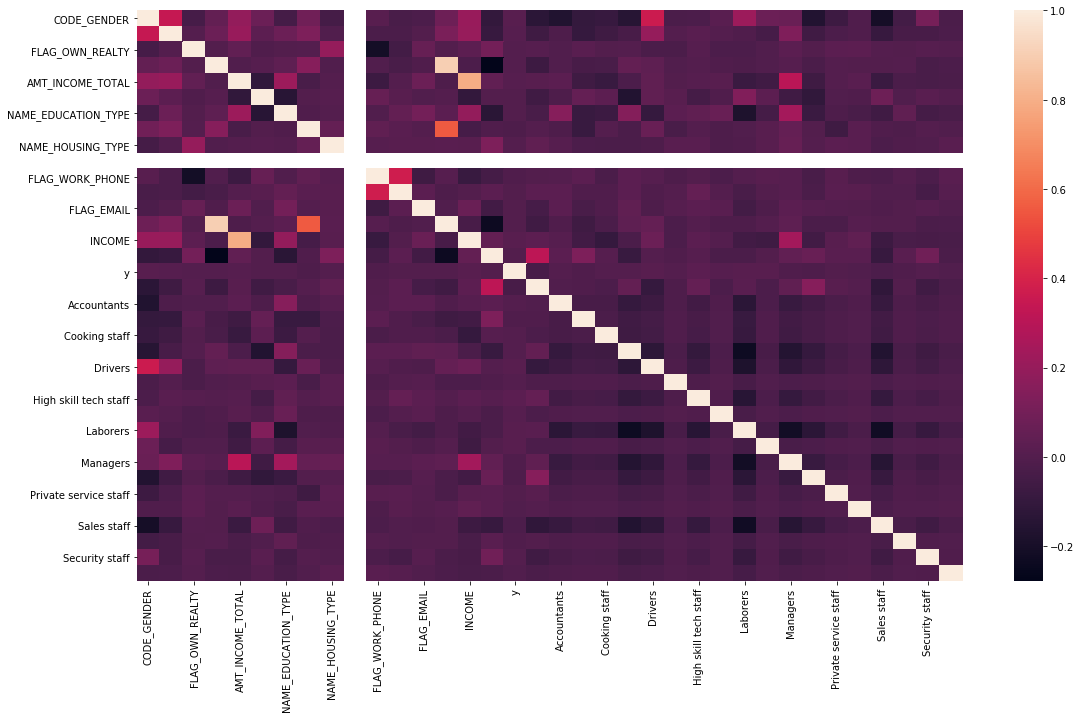

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'INCOME', 'AGE', 'y', 'SENIORITY', 'Accountants', 'Cleaning staff',
       'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'Private service staff', 'Realty agents',
       'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype='object')


In [162]:
sn.heatmap(korelacje1, annot=False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()
print(korelacje1.columns)

In [163]:
x_values2 = x_values.astype('int64')
y_targets2 = y_targets.astype('int64')

In [164]:
for i in x_values2.columns:
    korelacje2 = x_values2[i].corr(y_targets2)
    print(i, korelacje2)

CODE_GENDER 0.012570686330962505
FLAG_OWN_CAR 0.009962621149096948
FLAG_OWN_REALTY 0.0015025938482710343
CNT_CHILDREN 0.003720941292274026
AMT_INCOME_TOTAL 0.010097225792890366
NAME_INCOME_TYPE -0.0023602151260665206
NAME_EDUCATION_TYPE -0.002496333867246471
NAME_FAMILY_STATUS -0.015687203806482614
NAME_HOUSING_TYPE 0.006395386843013145
FLAG_MOBIL nan
FLAG_WORK_PHONE -0.011062624777992866
FLAG_PHONE -0.0020618468222725886
FLAG_EMAIL -0.0014529202291196047
CNT_FAM_MEMBERS -0.001700099224112601
INCOME 0.014776475515033449
AGE -0.0026969429919139203
SENIORITY -0.036039202803277964
Accountants 0.005056436022629652
Cleaning staff -0.011985729027619081
Cooking staff 0.0036667569901752337
Core staff 0.003976605412861443
Drivers 0.012766175071209319
HR staff 0.005957585186420474
High skill tech staff 0.02356092393700747
IT staff 0.008470717275078499
Laborers 0.012033230295013558
Low-skill Laborers 0.014138254204430403
Managers -0.01301826534202127
Medicine staff -0.018465886275481496
Private s

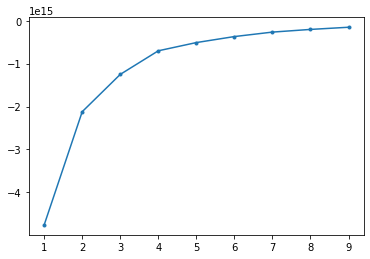

In [124]:
scores = [KMeans(k).fit(df_no_na).score(df_no_na) for k in range(1, 10)]
plt.plot(range(1, 10), scores, markersize=3, marker="o")
plt.show() 

In [125]:
ks = KMeans(4).fit(df_no_na).predict(df_no_na)

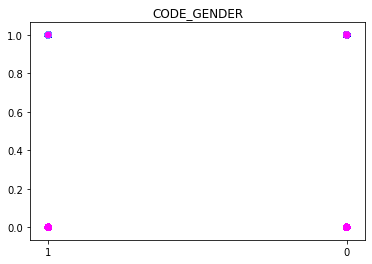

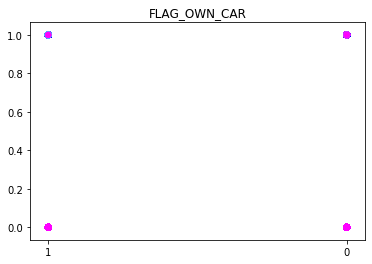

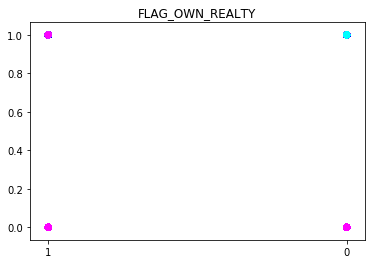

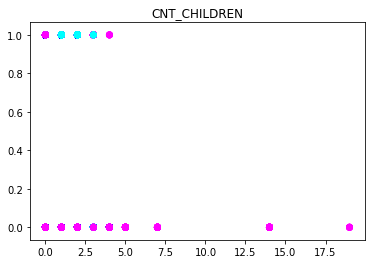

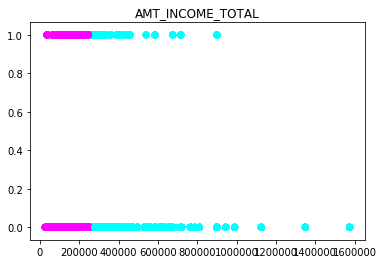

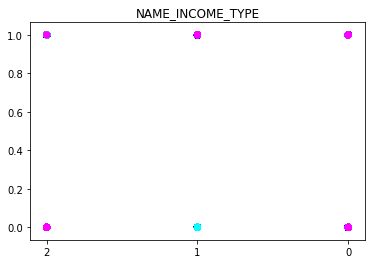

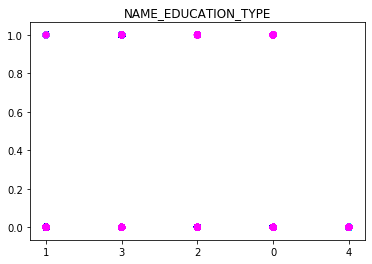

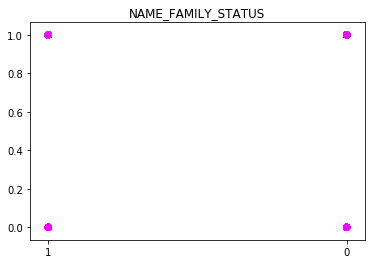

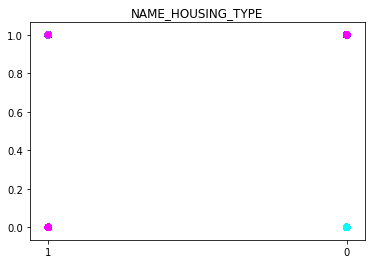

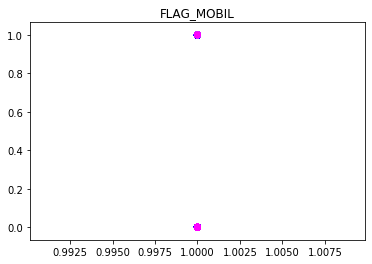

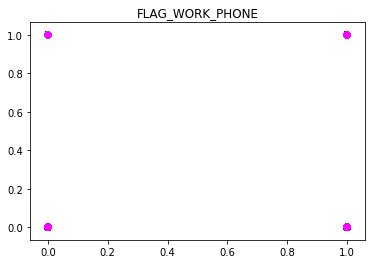

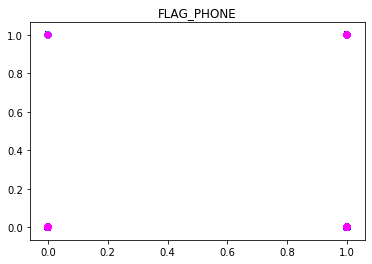

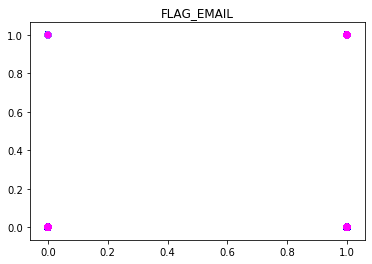

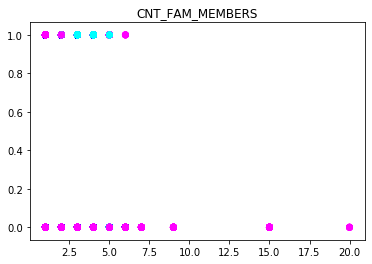

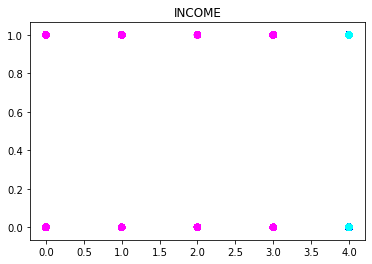

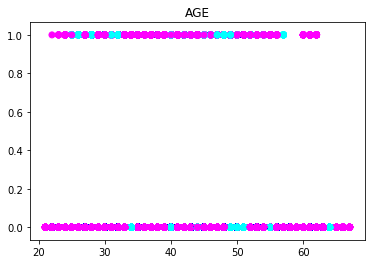

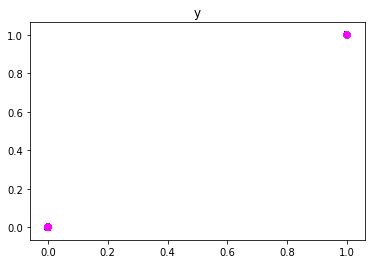

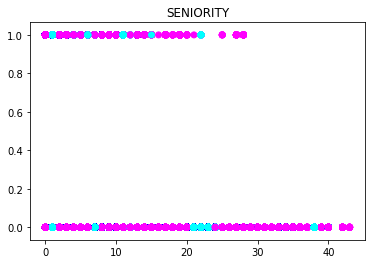

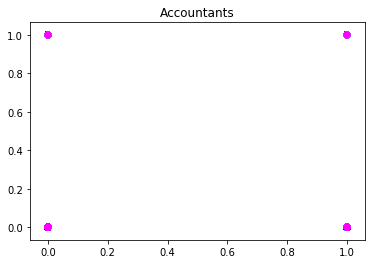

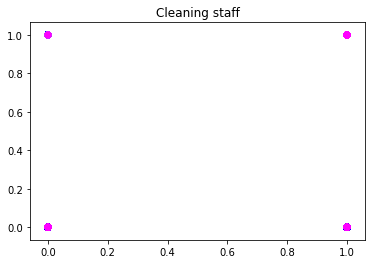

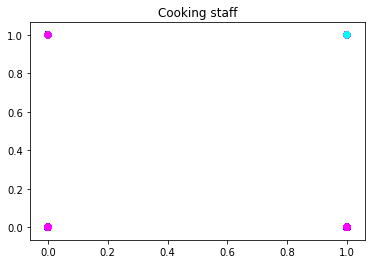

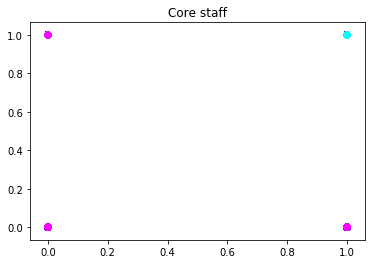

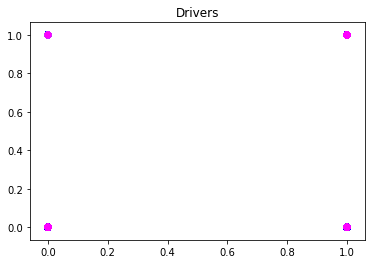

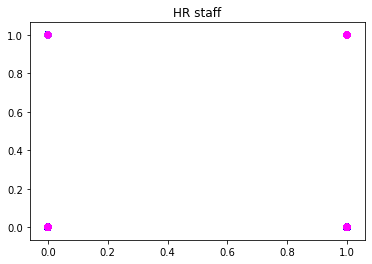

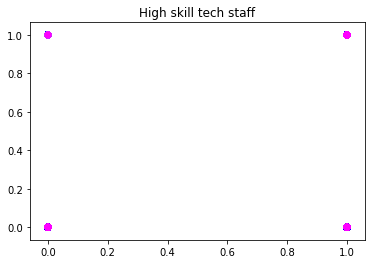

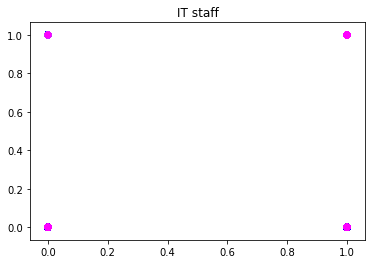

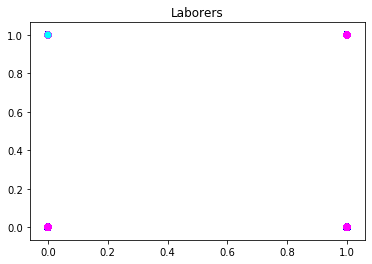

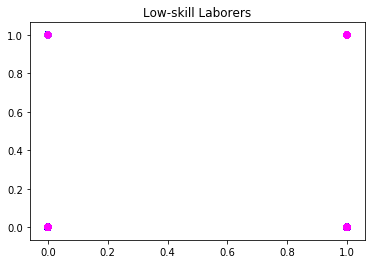

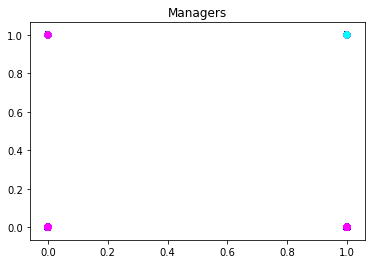

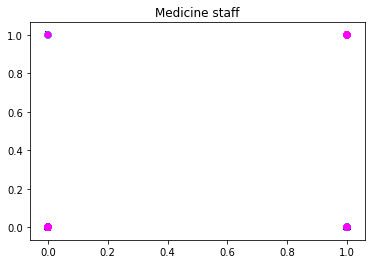

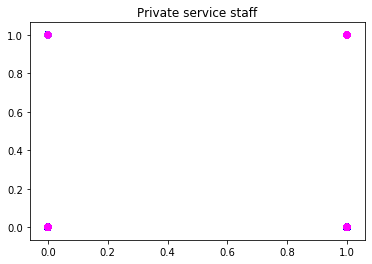

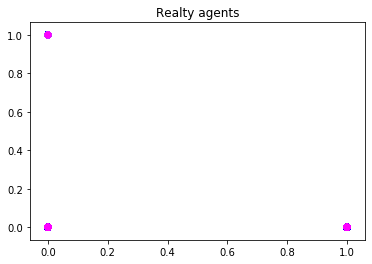

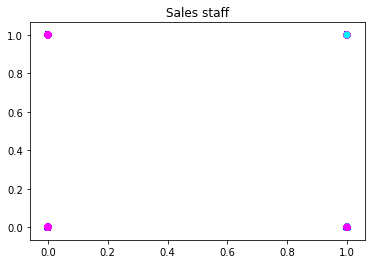

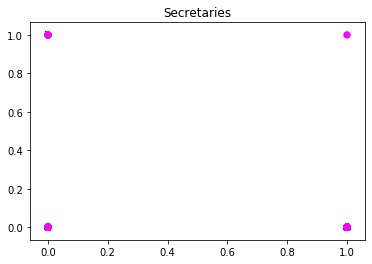

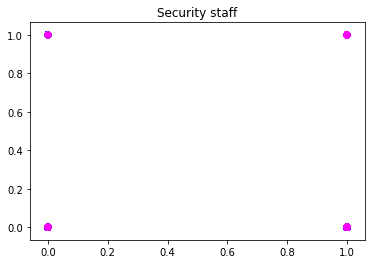

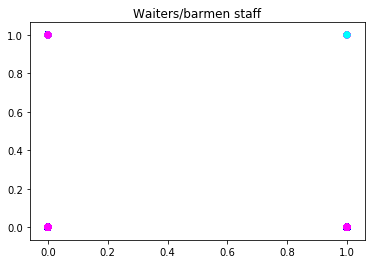

In [139]:
for i in df_no_na.columns:
    plt.scatter(df_no_na[i], df_no_na['y'], c=ks, cmap='cool')
    plt.title(i)
    plt.show()

# Dawid - korelacja (zawód jako labels)

In [143]:
df_le = df1[df1['OCCUPATION_TYPE'].isna() == False]

In [145]:
df_le.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'INCOME', 'AGE',
       'y', 'SENIORITY'],
      dtype='object')

In [146]:
df_le = df_le.drop(columns=['ID', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [147]:
le = preprocessing.LabelEncoder()

In [150]:
df_le['OCCUPATION_TYPE_LABELED'] = le.fit_transform(df_le['OCCUPATION_TYPE'])

In [151]:
df_le2 = df_le.drop(columns='OCCUPATION_TYPE')

In [153]:
df_le2.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'INCOME', 'AGE', 'y', 'SENIORITY', 'OCCUPATION_TYPE_LABELED'],
      dtype='object')

In [154]:
x_values_le = df_le2.drop(columns='y')
y_targets_le = df_le2['y']

In [159]:
korelacje1_le = df_le2.astype('int64').corr()
korelacje1_le

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,INCOME,AGE,y,SENIORITY,OCCUPATION_TYPE_LABELED
CODE_GENDER,1.00,0.35,-0.04,0.05,0.19,0.08,-0.05,0.09,-0.04,nan,0.02,-0.03,-0.02,0.08,0.21,-0.11,0.01,-0.13,-0.02
FLAG_OWN_CAR,0.35,1.00,0.00,0.08,0.21,0.03,0.08,0.13,-0.01,nan,-0.03,-0.03,-0.00,0.12,0.20,-0.09,0.01,-0.06,-0.05
FLAG_OWN_REALTY,-0.04,0.00,1.00,-0.00,0.04,-0.01,-0.00,0.00,0.20,nan,-0.21,-0.05,0.06,0.00,0.03,0.10,0.00,0.01,0.02
CNT_CHILDREN,0.05,0.08,-0.00,1.00,-0.00,0.01,0.03,0.15,-0.01,nan,-0.01,-0.03,-0.01,0.90,-0.02,-0.28,0.00,-0.07,-0.02
AMT_INCOME_TOTAL,0.19,0.21,0.04,-0.00,1.00,-0.11,0.22,-0.03,0.00,nan,-0.08,0.01,0.07,-0.02,0.79,0.04,0.01,0.02,0.00
NAME_INCOME_TYPE,0.08,0.03,-0.01,0.01,-0.11,1.00,-0.14,0.00,0.01,nan,0.06,0.01,-0.01,0.01,-0.10,0.00,-0.00,-0.06,0.06
NAME_EDUCATION_TYPE,-0.05,0.08,-0.00,0.03,0.22,-0.14,1.00,-0.01,0.01,nan,-0.01,0.05,0.10,0.02,0.19,-0.14,-0.00,-0.03,-0.09
NAME_FAMILY_STATUS,0.09,0.13,0.00,0.15,-0.03,0.00,-0.01,1.00,0.06,nan,0.04,0.02,0.00,0.56,-0.04,-0.01,-0.02,0.00,0.02
NAME_HOUSING_TYPE,-0.04,-0.01,0.20,-0.01,0.00,0.01,0.01,0.06,1.00,nan,0.01,0.02,0.01,0.02,0.01,0.13,0.01,0.04,0.02
FLAG_MOBIL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


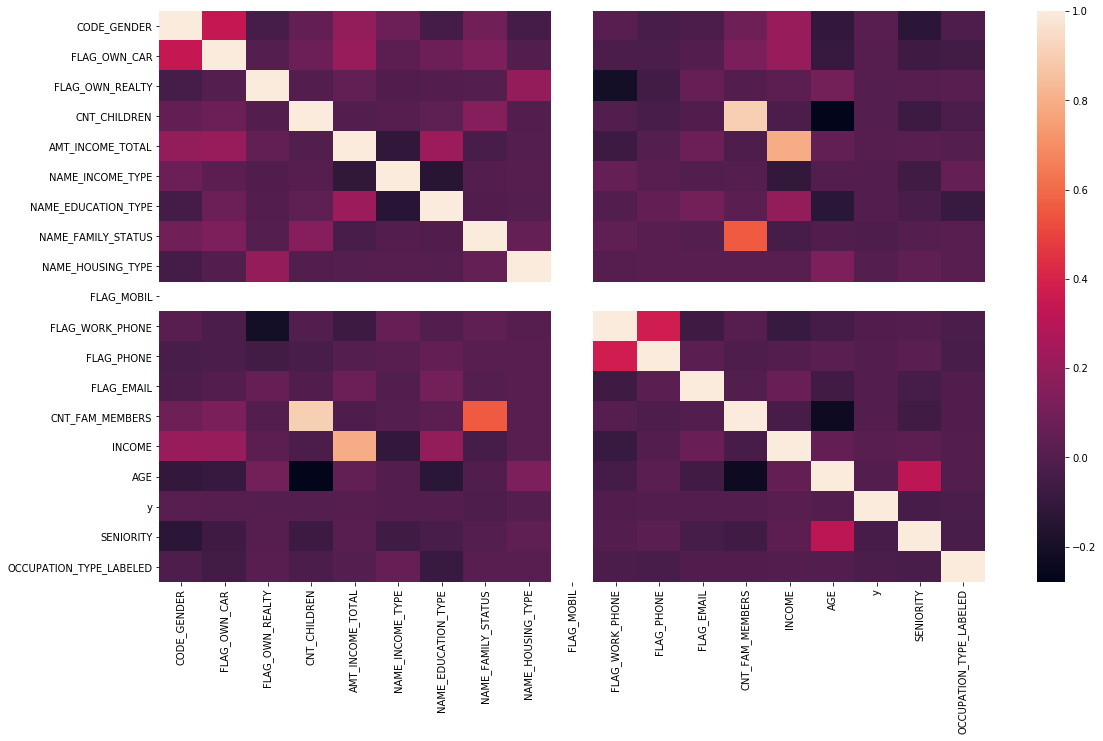

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'INCOME', 'AGE', 'y',
       'SENIORITY', 'Accountants', 'Cleaning staff', 'Cooking staff',
       'Core staff', 'Drivers', 'HR staff', 'High skill tech staff',
       'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers',
       'Medicine staff', 'Private service staff', 'Realty agents',
       'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype='object')


In [160]:
sn.heatmap(korelacje1_le, annot=False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()
print(korelacje1.columns)

In [165]:
x_values_le = x_values_le.astype('int64')
y_targets_le = y_targets_le.astype('int64')

In [166]:
for i in x_values_le.columns:
    korelacje2 = x_values_le[i].corr(y_targets_le)
    print(i, korelacje2)

CODE_GENDER 0.012570686330962505
FLAG_OWN_CAR 0.009962621149096948
FLAG_OWN_REALTY 0.0015025938482710343
CNT_CHILDREN 0.003720941292274026
AMT_INCOME_TOTAL 0.010097225792890366
NAME_INCOME_TYPE -0.0023602151260665206
NAME_EDUCATION_TYPE -0.002496333867246471
NAME_FAMILY_STATUS -0.015687203806482614
NAME_HOUSING_TYPE 0.006395386843013145
FLAG_MOBIL nan
FLAG_WORK_PHONE -0.011062624777992866
FLAG_PHONE -0.0020618468222725886
FLAG_EMAIL -0.0014529202291196047
CNT_FAM_MEMBERS -0.001700099224112601
INCOME 0.014776475515033449
AGE -0.0026969429919139203
SENIORITY -0.036039202803277964
OCCUPATION_TYPE_LABELED -0.025329691363663


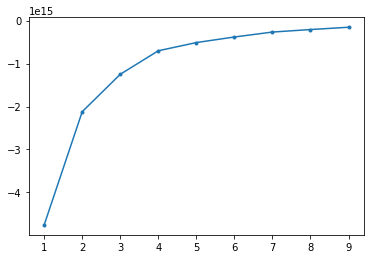

In [168]:
scores = [KMeans(k).fit(df_le2).score(df_le2) for k in range(1, 10)]
plt.plot(range(1, 10), scores, markersize=3, marker="o")
plt.show() 

In [171]:
ks = KMeans(4).fit(df_le2).predict(df_le2)

In [173]:
df_le2['OCCUPATION_TYPE_LABELED'] = le.inverse_transform(df_le2['OCCUPATION_TYPE_LABELED'])

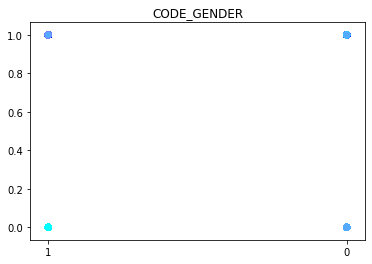

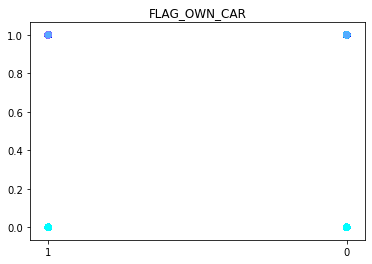

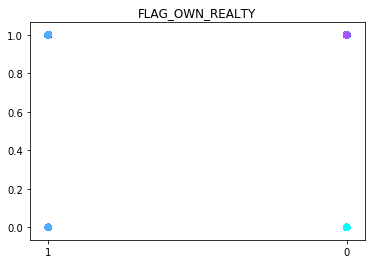

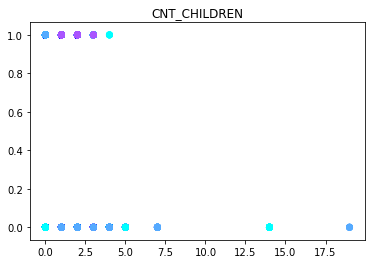

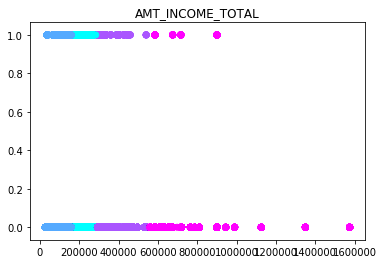

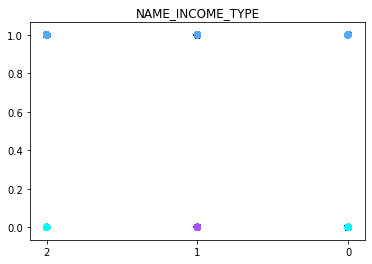

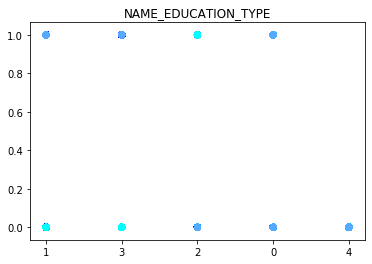

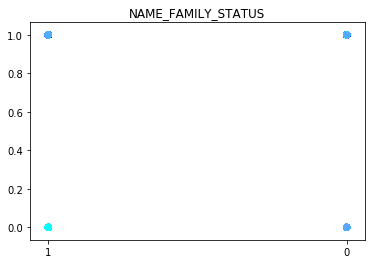

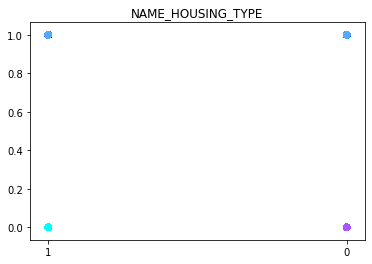

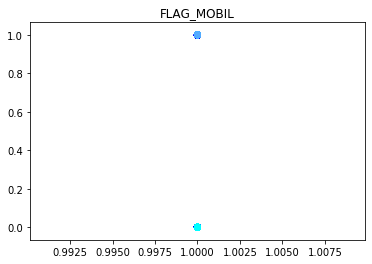

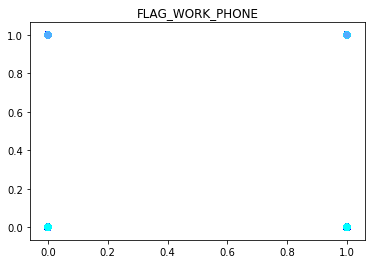

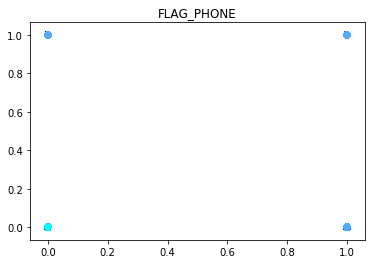

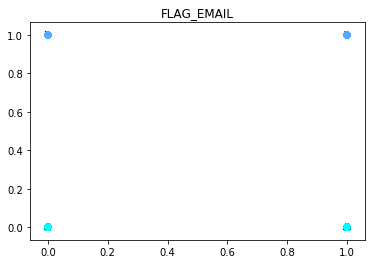

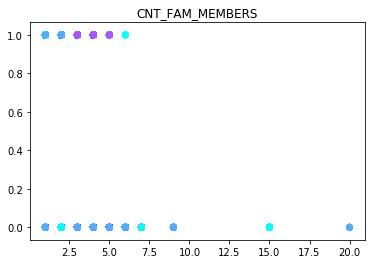

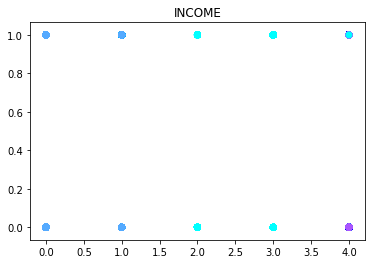

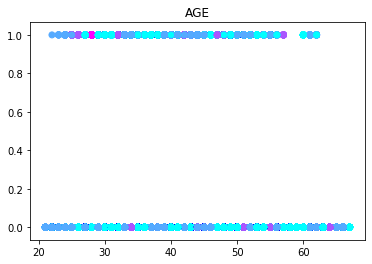

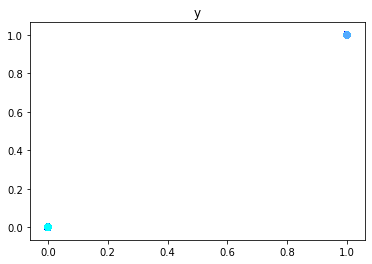

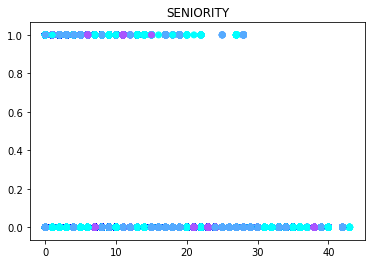

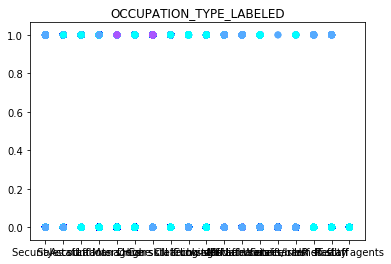

In [174]:
for i in df_le2.columns:
    plt.scatter(df_le2[i], df_le2['y'], c=ks, cmap='Dark2')
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()